In [1]:
import os
from os.path import join
import re
import math
import pickle as pkl
import time
import numpy as np
import pandas as pd
from easydict import EasyDict as edict
import h5py
import seaborn as sns
import matplotlib.pyplot as plt
from neuro_data_analysis.mat_data_translate_lib import h5_to_dict_simplify, print_hdf5_info
# set the pandas display options width
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)


mat_root = r"S:\Data-Ephys-MAT"
pkl_root = r"S:\Data-Ephys-PKL"
exp_record_pathdict = {"Alfa": r"S:\Exp_Record_Alfa.xlsx", 
                       "Beto": r"S:\ExpSpecTable_Augment.xlsx",
                       "Caos": r"S:\Exp_Record_Caos.xlsx",
                       "Diablito": r"S:\Exp_Record_Diablito.xlsx"}


In [2]:
ExpRecord_Evolution_All = pd.read_csv(r"ExpRecord_BigGAN_Hessian_Evol_ABCD_w_meta.csv")
ExpRecord_Hessian_All = pd.read_csv(r"ExpRecord_BigGAN_Hessian_tuning_ABCD_w_meta.csv")

In [3]:

from neuro_data_analysis.neural_tuning_analysis_lib import organize_unit_info, maybe_add_unit_id_to_meta, \
    calculate_neural_responses, parse_stim_info, find_full_image_paths, load_space_images
from core.utils.montage_utils import PIL_array_to_montage, PIL_array_to_montage_score_frame
from core.utils.dataset_utils import ImagePathDataset
from core.utils.plot_utils import saveallforms

c:\Users\ponce\.conda\envs\torch\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


0 Caos-12022024-002 Caos 1
GAN x optim :
 thread 1 fc6 x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[3.]])}] 
 thread 2 BigGAN x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[0.05]])}]


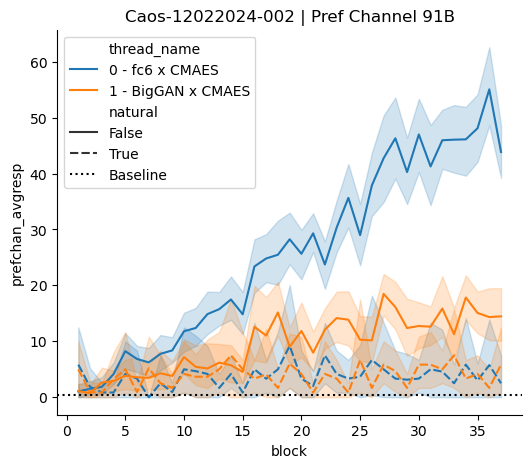

1 Caos-12022024-005 Caos 2
GAN x optim :
 thread 1 fc6 x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[3.]])}] 
 thread 2 BigGAN x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[0.05]])}]


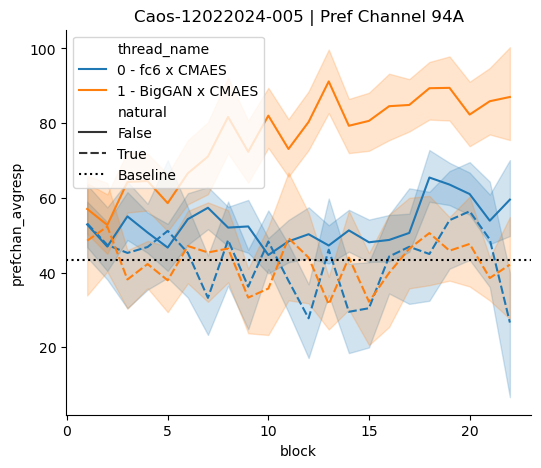

2 Caos-12042024-002 Caos 3
GAN x optim :
 thread 1 fc6 x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[3.]])}] 
 thread 2 BigGAN x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[0.05]])}]


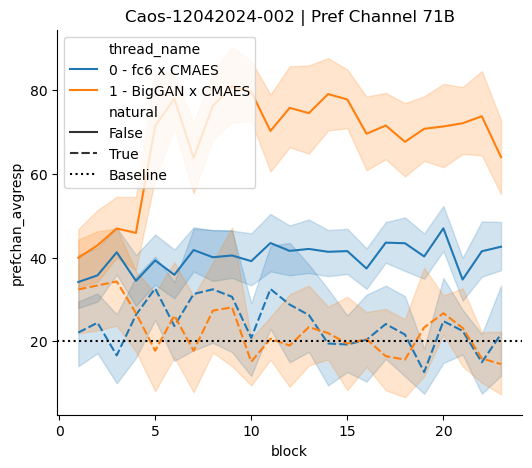

3 Caos-12042024-006 Caos 4
GAN x optim :
 thread 1 fc6 x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[3.]])}] 
 thread 2 BigGAN x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[0.05]])}]


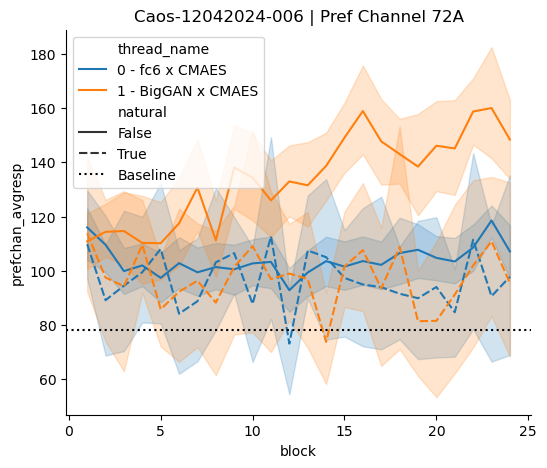

4 Caos-12092024-003 Caos 5
GAN x optim :
 thread 1 fc6 x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[3.]])}] 
 thread 2 BigGAN x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[0.05]])}]


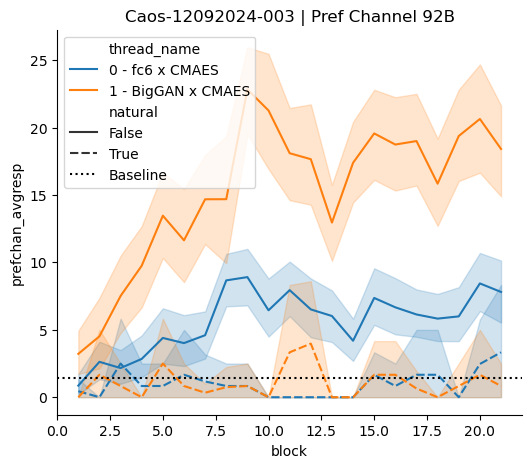

5 Caos-12102024-002 Caos 6
GAN x optim :
 thread 1 fc6 x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[3.]])}] 
 thread 2 BigGAN x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[0.05]])}]


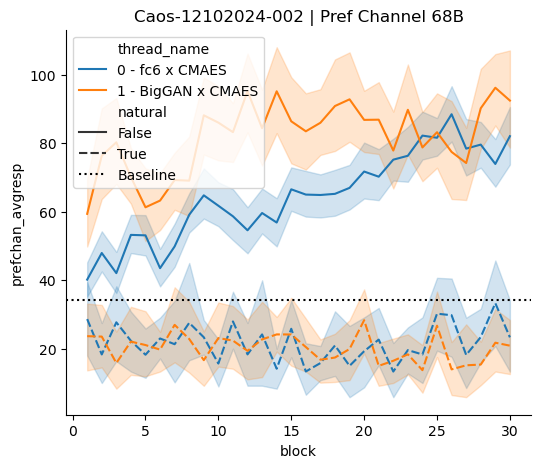

6 Caos-12102024-005 Caos 7
GAN x optim :
 thread 1 fc6 x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[3.]])}] 
 thread 2 BigGAN x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[0.05]])}]


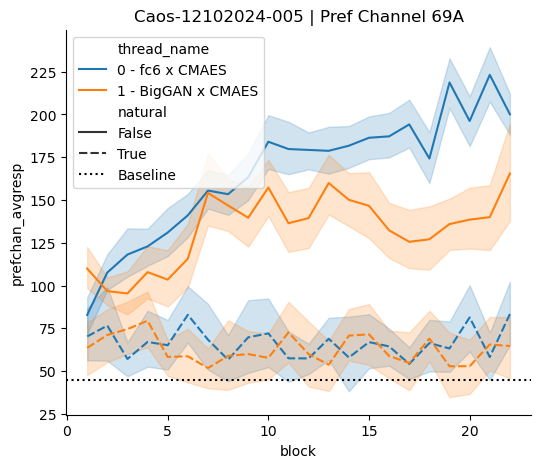

7 Diablito-03122024-002 Diablito 1
GAN x optim :
 thread 1 fc6 x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[3.]])}] 
 thread 2 BigGAN x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[0.05]])}]


8 Diablito-11122024-002 Diablito 2
GAN x optim :
 thread 1 fc6 x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[3.]])}] 
 thread 2 BigGAN x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[0.05]])}]


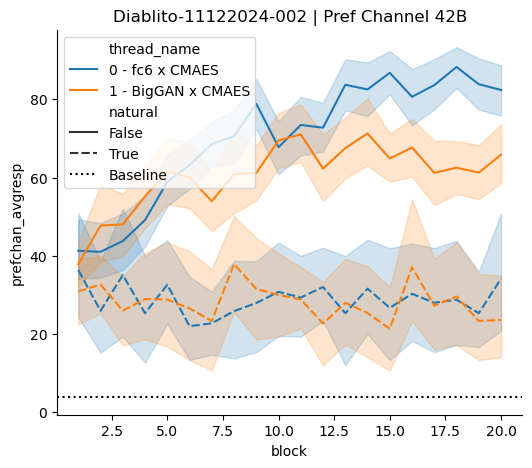

9 Diablito-11122024-004 Diablito 3
GAN x optim :
 thread 1 fc6 x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[3.]])}] 
 thread 2 BigGAN x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[0.05]])}]


10 Diablito-12122024-003 Diablito 4
GAN x optim :
 thread 1 fc6 x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[3.]])}] 
 thread 2 BigGAN x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[0.05]])}]


11 Diablito-12122024-005 Diablito 5
GAN x optim :
 thread 1 fc6 x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[3.]])}] 
 thread 2 BigGAN x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[0.05]])}]


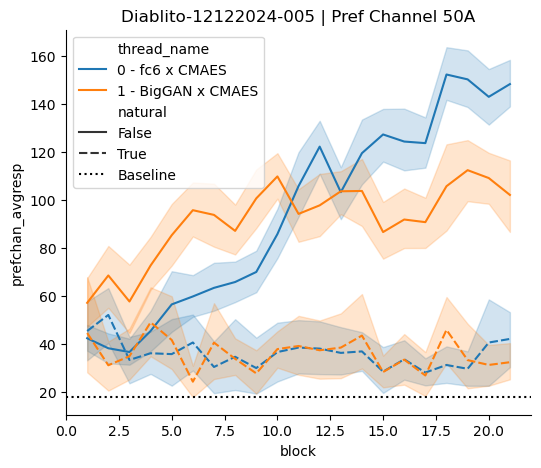

12 Alfa-04082020-002 Alfa 1
GAN x optim :
 thread 1 fc6 x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[3.]])}] 
 thread 2 BigGAN_class x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[0.06]])}]


13 Alfa-06082020-002 Alfa 2
GAN x optim :
 thread 1 fc6 x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[3.]])}] 
 thread 2 BigGAN_class x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[0.06]])}]


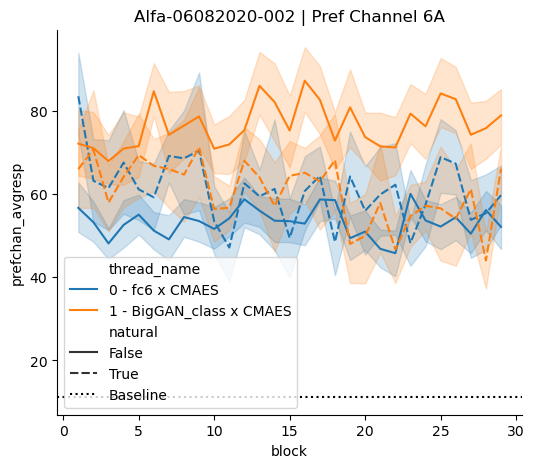

14 Alfa-12082020-003 Alfa 3
GAN x optim :
 thread 1 fc6 x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[3.]])}] 
 thread 2 BigGAN_class x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[0.06]])}]


15 Alfa-14082020-002 Alfa 4
GAN x optim :
 thread 1 fc6 x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[3.]])}] 
 thread 2 BigGAN_class x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[0.06]])}]


16 Alfa-25082020-006 Alfa 5
GAN x optim :
 thread 1 fc6 x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[3.]])}] 
 thread 2 BigGAN_class x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[0.06]])}]


17 Alfa-27082020-002 Alfa 6
GAN x optim :
 thread 1 fc6 x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[3.]])}] 
 thread 2 BigGAN_class x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[0.06]])}]


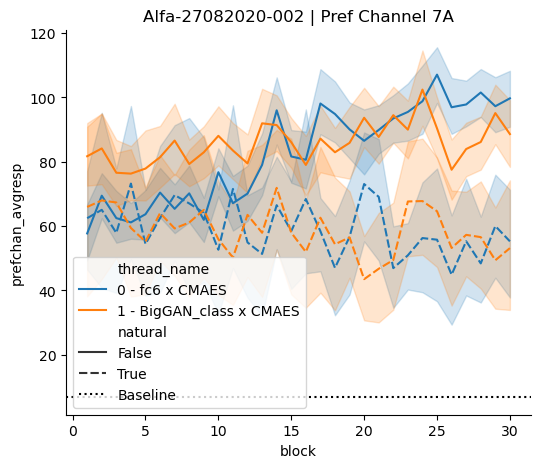

18 Alfa-01092020-003 Alfa 7
GAN x optim :
 thread 1 fc6 x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[3.]])}] 
 thread 2 BigGAN_class x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[0.06]])}]


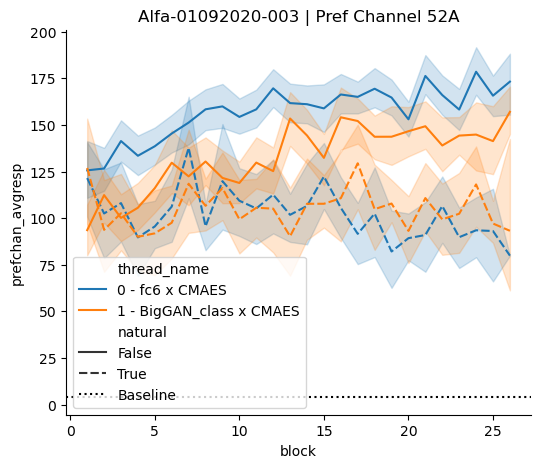

19 Alfa-02092020-003 Alfa 8
GAN x optim :
 thread 1 fc6 x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[3.]])}] 
 thread 2 BigGAN_class x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[0.06]])}]


20 Alfa-02092020-005 Alfa 9
GAN x optim :
 thread 1 fc6 x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[3.]])}] 
 thread 2 BigGAN_class x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[0.06]])}]


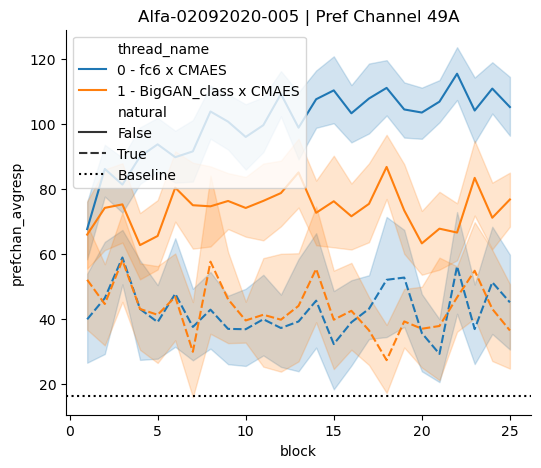

21 Alfa-08092020-002 Alfa 10
GAN x optim :
 thread 1 fc6 x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[3.]])}] 
 thread 2 BigGAN_class x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[0.06]])}]


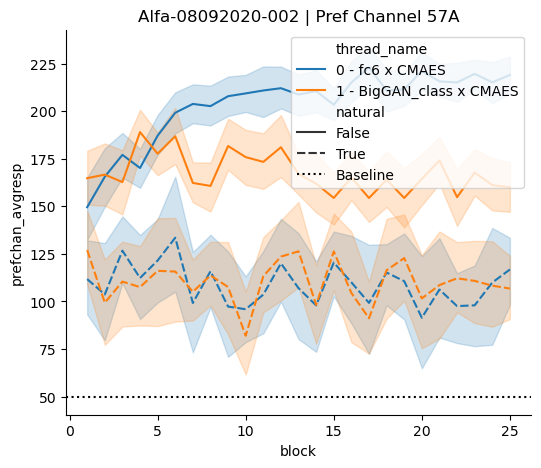

22 Alfa-11092020-002 Alfa 11
GAN x optim :
 thread 1 fc6 x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[3.]])}] 
 thread 2 BigGAN_class x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[0.06]])}]


23 Alfa-11092020-005 Alfa 12
GAN x optim :
 thread 1 fc6 x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[3.]])}] 
 thread 2 BigGAN_class x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[0.06]])}]


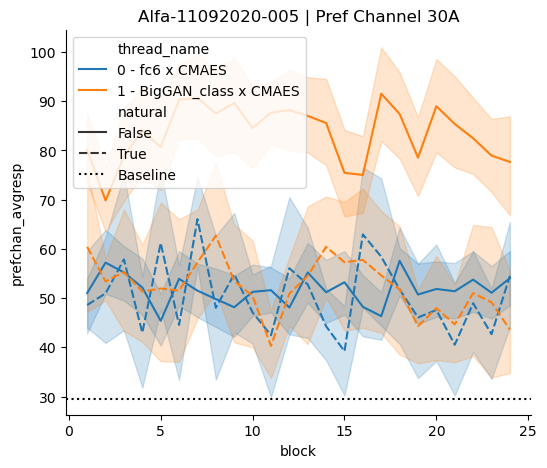

24 Alfa-16092020-002 Alfa 13
GAN x optim :
 thread 1 fc6 x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[3.]])}] 
 thread 2 BigGAN_class x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[0.06]])}]


25 Alfa-16092020-004 Alfa 14
GAN x optim :
 thread 1 fc6 x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[3.]])}] 
 thread 2 BigGAN_class x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[0.06]])}]


26 Alfa-27102020-004 Alfa 15
GAN x optim :
 thread 1 fc6 x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[3.]])}] 
 thread 2 BigGAN_class x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[0.06]])}]


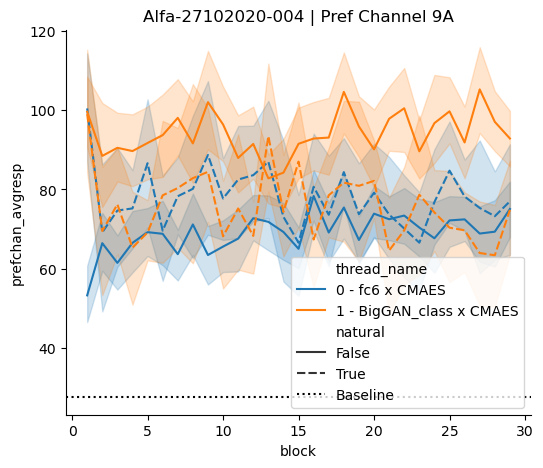

27 Alfa-04112020-002 Alfa 16
GAN x optim :
 thread 1 fc6 x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[3.]])}] 
 thread 2 BigGAN_class x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[0.06]])}]


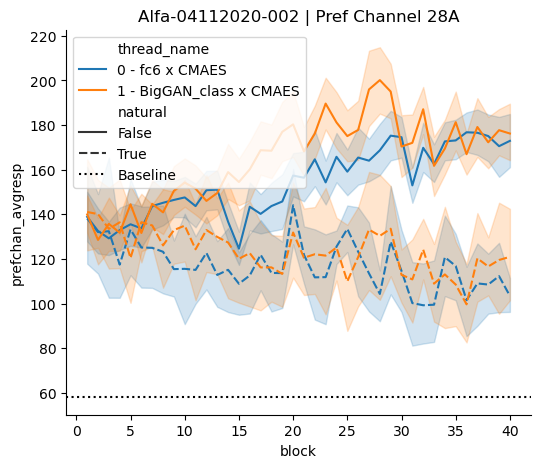

28 Alfa-06112020-003 Alfa 17
GAN x optim :
 thread 1 fc6 x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[3.]])}] 
 thread 2 BigGAN_class x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[0.06]])}]


29 Alfa-12012021-002 Alfa 18
GAN x optim :
 thread 1 fc6 x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[3.]])}] 
 thread 2 BigGAN x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[0.05]])}]


30 Alfa-13012021-002 Alfa 19
GAN x optim :
 thread 1 fc6 x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[3.]])}] 
 thread 2 BigGAN x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[0.05]])}]


31 Alfa-19022021-003 Alfa 20
GAN x optim :
 thread 1 fc6 x CMAES_Hessian [{'init_sigma': array([[3.]]), 'mode': array([[0.]]), 'scaling_max': array([[1.]]), 'scaling_med': array([[1.]]), 'scaling_min': array([[1.]])}] 
 thread 2 BigGAN x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[0.05]])}]


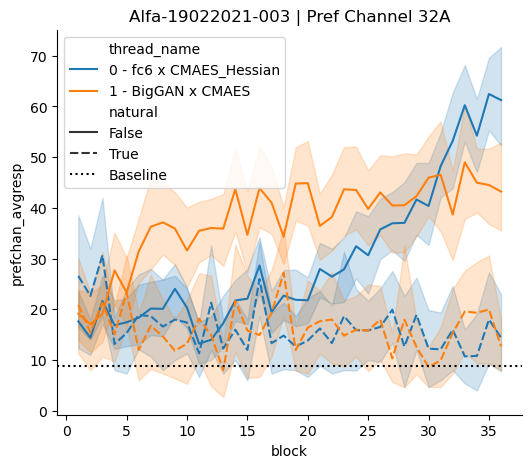

32 Alfa-25022021-002 Alfa 21
GAN x optim :
 thread 1 fc6 x CMAES_Hessian [{'init_sigma': array([[3.]]), 'mode': array([[0.]]), 'scaling_max': array([[1.]]), 'scaling_med': array([[1.]]), 'scaling_min': array([[1.]])}] 
 thread 2 BigGAN x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[0.05]])}]


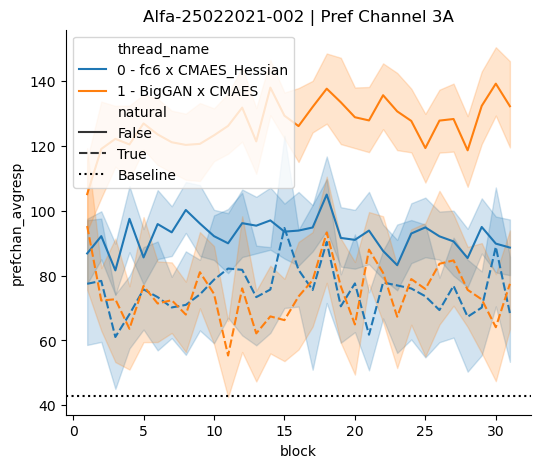

33 Alfa-26022021-003 Alfa 22
GAN x optim :
 thread 1 fc6 x CMAES_Hessian [{'init_sigma': array([[3.]]), 'mode': array([[0.]]), 'scaling_max': array([[1.]]), 'scaling_med': array([[1.]]), 'scaling_min': array([[1.]])}] 
 thread 2 BigGAN x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[0.05]])}]


34 Alfa-12032021-004 Alfa 23
GAN x optim :
 thread 1 fc6 x CMAES_Hessian [{'init_sigma': array([[3.]]), 'mode': array([[0.]]), 'scaling_max': array([[1.]]), 'scaling_med': array([[1.]]), 'scaling_min': array([[1.]])}] 
 thread 2 BigGAN x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[0.05]])}]


35 Alfa-01042021-002 Alfa 24
GAN x optim :
 thread 1 fc6 x CMAES_Hessian [{'init_sigma': array([[3.]]), 'mode': array([[0.]]), 'scaling_max': array([[1.]]), 'scaling_med': array([[1.]]), 'scaling_min': array([[1.]])}] 
 thread 2 BigGAN_class x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[0.06]])}]


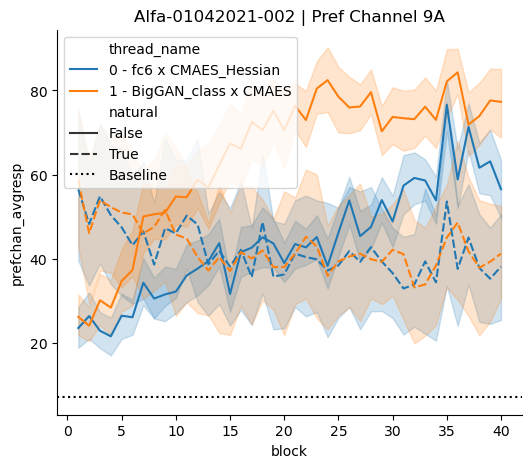

36 Alfa-08042021-002 Alfa 25
GAN x optim :
 thread 1 fc6 x CMAES_Hessian [{'init_sigma': array([[3.]]), 'mode': array([[0.]]), 'scaling_max': array([[1.]]), 'scaling_med': array([[1.]]), 'scaling_min': array([[1.]])}] 
 thread 2 BigGAN_class x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[0.06]])}]


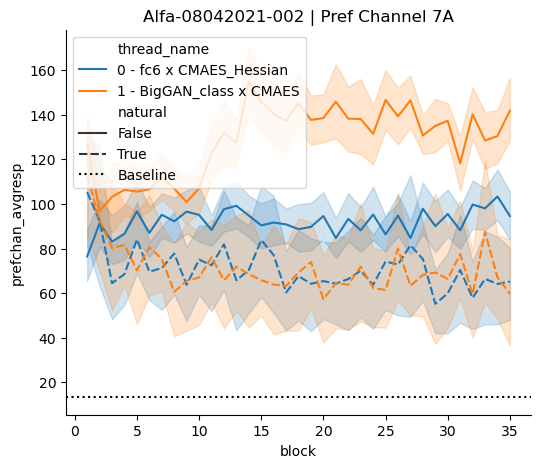

37 Alfa-14052021-003 Alfa 26
GAN x optim :
 thread 1 fc6 x CMAES_Hessian [{'init_sigma': array([[3.]]), 'mode': array([[0.]]), 'scaling_max': array([[1.]]), 'scaling_med': array([[1.]]), 'scaling_min': array([[1.]])}] 
 thread 2 BigGAN_class x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[0.06]])}]


38 Beto-27072020-002 Beto 1
GAN x optim :
 thread 1 fc6 x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[3.]])}] 
 thread 2 BigGAN_class x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[0.06]])}]


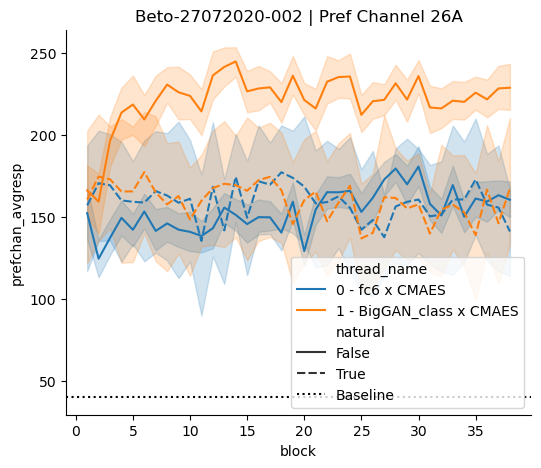

39 Beto-05082020-002 Beto 2
GAN x optim :
 thread 1 fc6 x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[3.]])}] 
 thread 2 BigGAN_class x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[0.06]])}]


40 Beto-07082020-002 Beto 3
GAN x optim :
 thread 1 fc6 x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[3.]])}] 
 thread 2 BigGAN_class x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[0.06]])}]


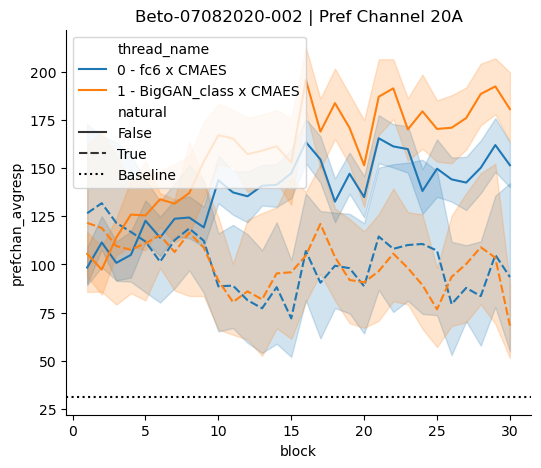

41 Beto-11082020-003 Beto 4
GAN x optim :
 thread 1 fc6 x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[3.]])}] 
 thread 2 BigGAN_class x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[0.06]])}]


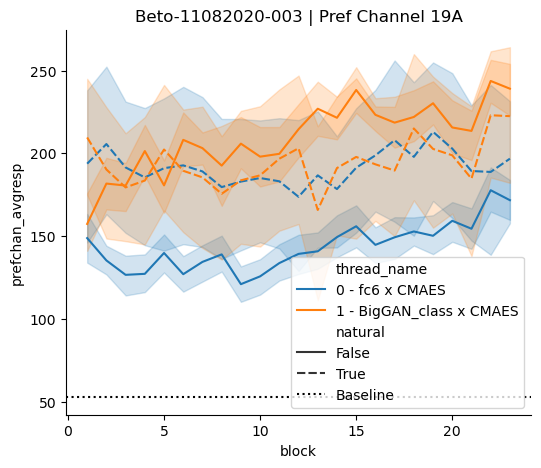

42 Beto-13082020-003 Beto 5
GAN x optim :
 thread 1 fc6 x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[3.]])}] 
 thread 2 BigGAN_class x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[0.06]])}]


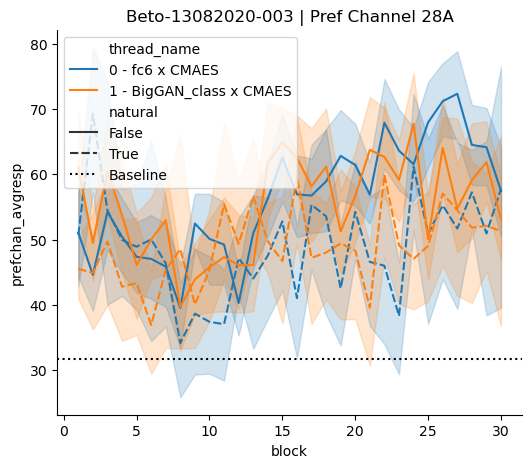

43 Beto-17082020-002 Beto 6
GAN x optim :
 thread 1 fc6 x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[3.]])}] 
 thread 2 BigGAN_class x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[0.06]])}]


44 Beto-18082020-002 Beto 7
GAN x optim :
 thread 1 fc6 x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[3.]])}] 
 thread 2 BigGAN_class x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[0.06]])}]


45 Beto-20082020-003 Beto 8
GAN x optim :
 thread 1 fc6 x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[3.]])}] 
 thread 2 BigGAN_class x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[0.06]])}]


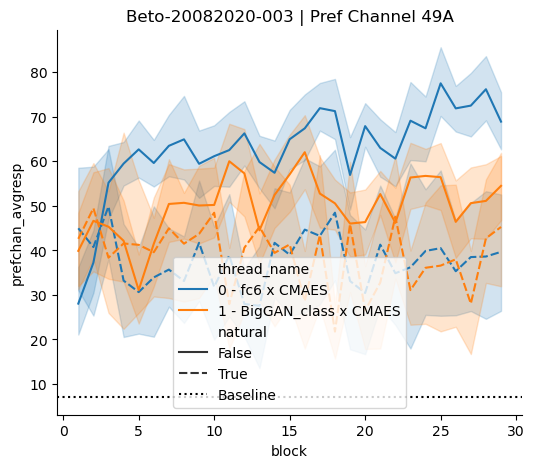

46 Beto-24082020-002 Beto 9
GAN x optim :
 thread 1 fc6 x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[3.]])}] 
 thread 2 BigGAN_class x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[0.06]])}]


47 Beto-31082020-002 Beto 10
GAN x optim :
 thread 1 fc6 x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[3.]])}] 
 thread 2 BigGAN_class x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[0.06]])}]


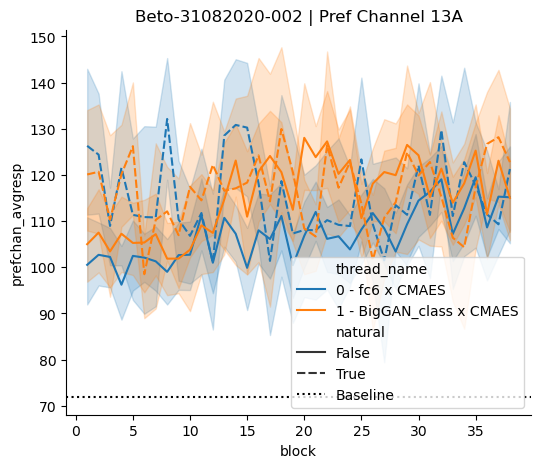

48 Beto-07092020-002 Beto 11
GAN x optim :
 thread 1 fc6 x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[3.]])}] 
 thread 2 BigGAN_class x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[0.06]])}]


49 Beto-10092020-002 Beto 12
GAN x optim :
 thread 1 fc6 x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[3.]])}] 
 thread 2 BigGAN_class x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[0.06]])}]


50 Beto-14092020-003 Beto 13
GAN x optim :
 thread 1 fc6 x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[3.]])}] 
 thread 2 BigGAN_class x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[0.06]])}]


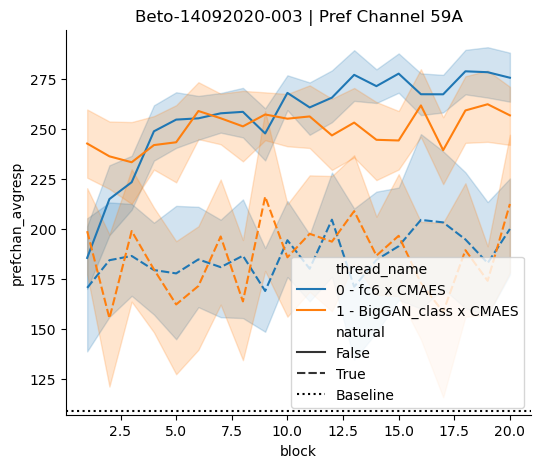

51 Beto-17092020-002 Beto 14
GAN x optim :
 thread 1 fc6 x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[3.]])}] 
 thread 2 BigGAN_class x CMAES [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[0.06]])}]


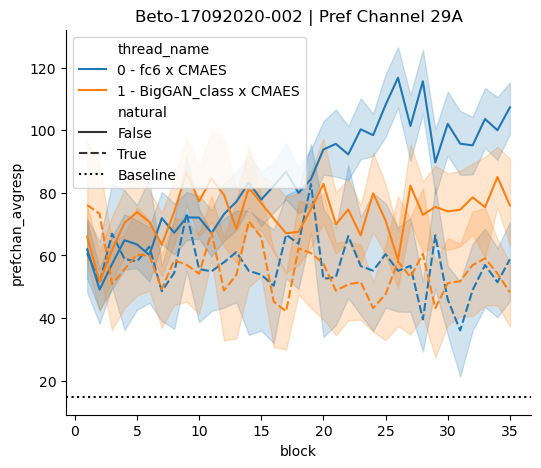

In [16]:
for rowi, exprow in ExpRecord_Evolution_All.iterrows():
    print(rowi, exprow.ephysFN, exprow.Animal, int(exprow.Expi))
    figdir = join(r"E:\OneDrive - Harvard University\BigGAN_Hessian", f"Evol_{exprow.Animal}_exp{exprow.Expi}_{exprow.ephysFN}")
    os.makedirs(figdir, exist_ok=True)
    data = pkl.load(open(join(pkl_root, f"{exprow.ephysFN}.pkl"), "rb"))
    rasters = data["rasters"]
    meta = data["meta"]
    Trials = data["Trials"]
    imageName = np.squeeze(Trials.imageName)
    stimuli_dir = exprow.stimuli
    prefchan = Trials.TrialRecord.User.prefChan
    prefunit = Trials.TrialRecord.User.unit_perChan
    space_cfg = Trials.TrialRecord.User.space_cfg
    optim_cfg = Trials.TrialRecord.User.optim_opts
    evolution_cfg = Trials.TrialRecord.User.evoConfiguration
    thread_num = evolution_cfg.shape[1]
    if space_cfg.shape == (2, 1):
        space_cfg = space_cfg.T
    GANspace1 = space_cfg[0, 0][0].item()
    GANspace2 = space_cfg[0, 1][0].item()
    space1_cfg = space_cfg[0, 0][1,0]
    space2_cfg = space_cfg[0, 1][1,0]
    optimizer1 = evolution_cfg[4][0]
    optimizer2 = evolution_cfg[4][1]
    optim1_cfg = optim_cfg[0][0]
    optim2_cfg = optim_cfg[1][0]
    imgpos = evolution_cfg[1][0].squeeze()
    imgsize = evolution_cfg[2][0].squeeze()
    # print(f"GAN x optim :\n thread 1 {GANspace1} x {optimizer1} [{space1_cfg}] [{optim1_cfg}] \n thread 2 {GANspace2} x {optimizer2} [{space2_cfg}] [{optim2_cfg}]")
    print(f"GAN x optim :\n thread 1 {GANspace1} x {optimizer1} [{optim1_cfg}] \n thread 2 {GANspace2} x {optimizer2} [{optim2_cfg}]")
    
    # Process unit information
    meta = maybe_add_unit_id_to_meta(meta, rasters,) 
    unit_info = organize_unit_info(meta, exprow)
    prefchan_id = unit_info["prefchan_id"]
    prefchan_str = unit_info["prefchan_str"]
    expstr = f"{exprow.ephysFN} | Pref Channel {prefchan_str}"
    stats = {}
    stats["evol_meta"] = {
        "prefchan": prefchan,
        "prefunit": prefunit,
        "imgpos": imgpos,
        "imgsize": imgsize,
        "GANspace1": GANspace1,
        "GANspace2": GANspace2,
        "space1_cfg": space1_cfg,
        "space2_cfg": space2_cfg,
        "optimizer1": optimizer1,
        "optimizer2": optimizer2,
        "optim1_cfg": optim1_cfg,
        "optim2_cfg": optim2_cfg
    }
    # Sort the image names into threads, gens, nats, and blocks
    imgnm = Trials.get('imageName', [])[0]
    row_gen = [
        ("gen" in name) and 
        ("block" in name) and 
        (not name[:2].isdigit()) and 
        (not name.endswith("_nat"))
        for name in imgnm
    ]
    row_gen = np.array(row_gen, dtype=bool)
    row_nat = ~ row_gen

    # Separate the thread 1 and 2 (and maybe thread 3, 4)
    thread_msks = []
    for threadi in range(thread_num):
        thread_str = f"thread{threadi:03d}"
        msk = [thread_str in name for name in imgnm]
        thread_msks.append(msk)
    assert sum([sum(m) for m in thread_msks]) == len(imgnm), "Images do not cover all threads"

    stats['stim'] = {
        'gen_msk': row_gen,
        'nat_msk': row_nat,
        'thread_msks': thread_msks
    }

    # Handle block information and color sequence
    block_arr = np.array(Trials.block).astype(int).flatten()
    block_list = list(range(block_arr.min(), block_arr.max() + 1))
    block_num = len(block_list)
    stats['evol'] = {}
    stats['evol']['block_arr'] = block_arr.tolist()  
    stats['evol']['block_n'] = block_num

    # Initialize generated and natural index sequences
    gen_idx_seq = np.empty((thread_num, block_num), dtype=object)
    nat_idx_seq = np.empty((thread_num, block_num), dtype=object)

    for threadi in range(thread_num):
        for blocki in block_list: # note here blocki is 1 based indexing. 
            gen_msk = row_gen & (block_arr == blocki) & thread_msks[threadi]
            nat_msk = row_nat & (block_arr == blocki) & thread_msks[threadi]
            gen_idx_seq[threadi, blocki - block_list[0]] = np.where(gen_msk)[0].tolist()
            nat_idx_seq[threadi, blocki - block_list[0]] = np.where(nat_msk)[0].tolist()

    # Collect trial by trial PSTH for the preferred channels
    pref_chan_idx = unit_info["prefchan_id"][0]
    rspwdw = slice(50, 200)
    bslwdw = slice(0, 45)
    # Assuming rasters is a 3D numpy array: trials x time x channels
    pref_gen_psth_col = [[rasters[idx, :, pref_chan_idx] for idx in thread_block] for thread_block in gen_idx_seq]
    pref_nat_psth_col = [[rasters[idx, :, pref_chan_idx] for idx in thread_block] for thread_block in nat_idx_seq]
    # Collect trial by trial response for every channel (mean over time 51 to 200)
    # Assuming rasters dimensions: channels x time x trials
    avgresp_mat = np.mean(rasters[:, rspwdw, :], axis=1)  # 0-based indexing
    bslresp_mat = np.mean(rasters[:, bslwdw, :], axis=1)  # 0-based indexing
    pref_bslresp = np.mean(bslresp_mat[:, pref_chan_idx], axis=0)

    gen_rspmat_col = [[avgresp_mat[idx, :,].squeeze() for idx in thread_block] for thread_block in gen_idx_seq]
    nat_rspmat_col = [[avgresp_mat[idx, :,].squeeze() for idx in thread_block] for thread_block in nat_idx_seq]
    pref_gen_avgresp_col = [[avgresp_mat[idx, pref_chan_idx].squeeze() for idx in thread_block] for thread_block in gen_idx_seq]
    pref_nat_avgresp_col = [[avgresp_mat[idx, pref_chan_idx].squeeze() for idx in thread_block] for thread_block in nat_idx_seq]

    stats['evol']['idx_seq'] = gen_idx_seq
    stats['evol']['psth'] = pref_gen_psth_col
    stats['evol']['rspmat'] = gen_rspmat_col
    
    thread_pattern = re.compile(r'thread(\d{3})_')
    thread_values = [int(thread_pattern.search(name).group(1)) if thread_pattern.search(name) else None for name in imgnm]
    stim_info_df = pd.DataFrame({"img_name": imgnm, "block": block_arr, "thread": thread_values, 
                                "generated": row_gen, "natural": row_nat, })
    stim_info_df["prefchan_avgresp"] = avgresp_mat[:, pref_chan_idx]
    stim_info_df["prefchan_bslresp"] = bslresp_mat[:, pref_chan_idx]
    
    # check the number of stimuli in the final block if any thread has < 10 stimuli, then create the mask out of the final block
    final_block_num = np.array([len(gen_idx_seq[threadi, -1]) for threadi in range(thread_num)])
    if not np.all(final_block_num >= 10):
        final_block_msk = block_arr == block_arr.max()
        stim_info_df["valid_block"] = ~ final_block_msk
    else:
        stim_info_df["valid_block"] = True
    
    stim_info_df["thread_name"] = stim_info_df["thread"].replace(\
        {0: f"0 - {GANspace1} x {optimizer1}", 
         1: f"1 - {GANspace2} x {optimizer2}"})

    plt.figure(figsize=(6, 5))
    sns.lineplot(data=stim_info_df.query("valid_block"), x="block", y="prefchan_avgresp", 
                hue="thread_name", style="natural", 
                hue_order=[f"0 - {GANspace1} x {optimizer1}", f"1 - {GANspace2} x {optimizer2}"])
    plt.axhline(pref_bslresp, color="black", linestyle=":", label="Baseline")
    plt.legend()
    plt.title(f"{exprow.ephysFN} | Pref Channel {prefchan_str}")
    saveallforms(figdir, f"{exprow.ephysFN}_prefchan_psth",)
    plt.show()
    
    stim_info_df.to_csv(join(figdir, f"prefchan_psth_avgresp.csv"), index=False)
    pkl.dump(stats, open(join(figdir, f"Evol_stats.pkl"), "wb"))

In [11]:
imgpos = evolution_cfg[1][0].squeeze()
imgsize = evolution_cfg[2][0].squeeze()

In [13]:
imgpos

array([0., 0.])

In [7]:
evolution_cfg

array([[array([[91.]]), array([[91.]])],
       [array([[0.],
               [0.]]), array([[0.],
                              [0.]])],
       [array([[2.]]), array([[2.]])],
       [array([[2.]]), array([[2.]])],
       ['CMAES', 'CMAES']], dtype=object)

### Collect stats for Evolution experiments. 

In [23]:
from scipy.stats import ttest_ind, ttest_rel
from core.utils.stats_utils import ttest_ind_print_df, ttest_ind_df, ttest_ind_print

In [24]:
stats['evol_meta']

{'prefchan': array([91., 91.]),
 'prefunit': array([2., 2.]),
 'imgpos': array([0., 0.]),
 'imgsize': array(2.),
 'GANspace1': 'fc6',
 'GANspace2': 'BigGAN',
 'space1_cfg': array([0., 0.]),
 'space2_cfg': array([0., 0.]),
 'optimizer1': 'CMAES',
 'optimizer2': 'CMAES',
 'optim1_cfg': {'Aupdate_freq': array([[10.]]), 'init_sigma': array([[3.]])},
 'optim2_cfg': {'Aupdate_freq': array([[10.]]), 'init_sigma': array([[0.05]])}}

In [25]:
figroot = r"E:\OneDrive - Harvard University\BigGAN_Hessian"
evol_stats_col = []
for rowi, exprow in ExpRecord_Evolution_All.iterrows():
    print(rowi, exprow.ephysFN, exprow.Animal, int(exprow.Expi))
    figdir = join(figroot, f"Evol_{exprow.Animal}_exp{exprow.Expi}_{exprow.ephysFN}")
    os.makedirs(figdir, exist_ok=True)
    stats = pkl.load(open(join(figdir, f"Evol_stats.pkl"), "rb"))
    stim_info_df = pd.read_csv(join(figdir, f"prefchan_psth_avgresp.csv"))
    print(list(stim_info_df.thread_name.unique()))
    refimg_resp_tab = stim_info_df.query("natural").groupby("img_name").agg({"prefchan_avgresp": [ "mean", "sem", "count"]})
    evolimg_block_resp_tab = stim_info_df.query("generated").groupby(["thread", "block"]).agg({"prefchan_avgresp": [ "mean", "sem", "count"]})
    maxblock_resp_idx = evolimg_block_resp_tab["prefchan_avgresp", "mean"].idxmax()
    maxblock_resp = evolimg_block_resp_tab["prefchan_avgresp", "mean"].max()
    maxref_resp_idx = refimg_resp_tab["prefchan_avgresp", "mean"].idxmax()
    maxref_resp = refimg_resp_tab["prefchan_avgresp", "mean"].max()
    maxevolnat_resp = max(maxblock_resp, maxref_resp) # use this to normalize the response, so that the max response is 1 for both natural and generated
    print("Max evolution response: ", maxblock_resp, f"at {maxblock_resp_idx}")
    print("Max natural response: ", maxref_resp, f"at {maxref_resp_idx}")
    print("Max response for normalization: ", maxevolnat_resp)
    bslresp_mean = stim_info_df["prefchan_bslresp"].mean()
    bslresp_std = stim_info_df["prefchan_bslresp"].std()
    print("Baseline response mean: ", bslresp_mean, "±", bslresp_std)

    maxresp_block_idx_thr0 = evolimg_block_resp_tab.xs(0, level='thread')["prefchan_avgresp", "mean"].idxmax()
    maxresp_block_idx_thr1 = evolimg_block_resp_tab.xs(1, level='thread')["prefchan_avgresp", "mean"].idxmax()
    maxresp_thr0 = evolimg_block_resp_tab.xs(0, level='thread')["prefchan_avgresp", "mean"].max()
    maxresp_thr1 = evolimg_block_resp_tab.xs(1, level='thread')["prefchan_avgresp", "mean"].max()
    genvalid_stim_info_df = stim_info_df.query("valid_block and generated")
    maxblock = genvalid_stim_info_df.block.max()

    init_mask_thr0 = ((genvalid_stim_info_df.block == 1) | (genvalid_stim_info_df.block == 2)) & (genvalid_stim_info_df.thread == 0)
    last_mask_thr0 = ((genvalid_stim_info_df.block == maxblock) | (genvalid_stim_info_df.block == maxblock - 1)) & (genvalid_stim_info_df.thread == 0)
    if maxresp_block_idx_thr0 > 1:
        max_mask_thr0 = ((genvalid_stim_info_df.block == maxresp_block_idx_thr0) | (genvalid_stim_info_df.block == maxresp_block_idx_thr0 - 1)) & (genvalid_stim_info_df.thread == 0)
    else:
        max_mask_thr0 = ((genvalid_stim_info_df.block == maxresp_block_idx_thr0) | (genvalid_stim_info_df.block == maxresp_block_idx_thr0 + 1)) & (genvalid_stim_info_df.thread == 0)

    init_mask_thr1 = ((genvalid_stim_info_df.block == 1) | (genvalid_stim_info_df.block == 2)) & (genvalid_stim_info_df.thread == 1)
    last_mask_thr1 = ((genvalid_stim_info_df.block == maxblock) | (genvalid_stim_info_df.block == maxblock - 1)) & (genvalid_stim_info_df.thread == 1)
    if maxresp_block_idx_thr1 > 1:
        max_mask_thr1 = ((genvalid_stim_info_df.block == maxresp_block_idx_thr1) | (genvalid_stim_info_df.block == maxresp_block_idx_thr1 - 1)) & (genvalid_stim_info_df.thread == 1)
    else:
        max_mask_thr1 = ((genvalid_stim_info_df.block == maxresp_block_idx_thr1) | (genvalid_stim_info_df.block == maxresp_block_idx_thr1 + 1)) & (genvalid_stim_info_df.thread == 1)

    # Define masks and threads
    masks_thr = [(last_mask_thr0, init_mask_thr0, max_mask_thr0),
                 (last_mask_thr1, init_mask_thr1, max_mask_thr1)]
    threads = [0, 1]

    # Initialize evolution statistics dictionary
    stats['evol_meta']["prefchan"] = stats['evol_meta']["prefchan"][0].squeeze()
    stats['evol_meta']["prefunit"] = stats['evol_meta']["prefunit"][0].squeeze()
    evol_stats = exprow.to_dict()
    evol_stats.update(stats['evol_meta'])
    # Iterate over threads to calculate statistics
    for i, (last_mask, init_mask, max_mask) in enumerate(masks_thr):
        # Calculate t-statistics
        tstat_last_init = ttest_ind_print_df(genvalid_stim_info_df, last_mask, init_mask, "prefchan_avgresp", sem=True, output_dof=True)
        tstat_max_init = ttest_ind_print_df(genvalid_stim_info_df, max_mask, init_mask, "prefchan_avgresp", sem=True, output_dof=True)

        # Update evolution statistics with response means
        evol_stats.update({
            f"init_resp_thr{i}": genvalid_stim_info_df[init_mask].prefchan_avgresp.mean(),
            f"last_resp_thr{i}": genvalid_stim_info_df[last_mask].prefchan_avgresp.mean(),
            f"max_resp_thr{i}": genvalid_stim_info_df[max_mask].prefchan_avgresp.mean(),
            f"max_evol_resp_thr{i}": [maxresp_thr0, maxresp_thr1][i],
            f"max_resp_thr{i}_blocknum": [maxresp_block_idx_thr0, maxresp_block_idx_thr1][i],
            f"lastinit_thr{i}_tval": tstat_last_init[0],
            f"lastinit_thr{i}_pval": tstat_last_init[1],
            f"lastinit_thr{i}_dof": tstat_last_init[2],
            f"maxinit_thr{i}_tval": tstat_max_init[0],
            f"maxinit_thr{i}_pval": tstat_max_init[1],
            f"maxinit_thr{i}_dof": tstat_max_init[2]
        })

    # Update evolution statistics with max responses
    evol_stats.update({
        "bslresp_mean": bslresp_mean,
        "bslresp_std": bslresp_std,
        "mean_ref_resp": refimg_resp_tab["prefchan_avgresp", "mean"].mean(),
        "max_ref_resp": maxref_resp,
        "max_ref_resp_imgname": maxref_resp_idx,
        "max_evol_resp": maxblock_resp,
        "max_evol_resp_blockidx": maxblock_resp_idx,
        "max_evolref_resp": max(maxblock_resp, maxref_resp),
    })
    evol_stats_col.append(evol_stats)


evol_stats_df = pd.DataFrame(evol_stats_col)
os.makedirs(join(figroot, "synopsis"), exist_ok=True)
evol_stats_df.to_csv(join(figroot, "synopsis", f"Evol_stats.csv"), index=False)

0 Caos-12022024-002 Caos 1
['0 - fc6 x CMAES', '1 - BigGAN x CMAES']
Max evolution response:  55.05023512499999 at (0, 36)
Max natural response:  17.979943963157893 at ILSVRC2012_val_00011961_thread000_nat
Max response for normalization:  55.05023512499999
Baseline response mean:  0.421648858525641 ± 3.098316215291493
prefchan_avgresp (N=80) ~ (N=70) 49.449+-2.191 (N=80) ~ 1.303+-0.450 (N=70) t=20.22, p=2.0e-44 df=148
prefchan_avgresp (N=80) ~ (N=70) 51.571+-2.422 (N=80) ~ 1.303+-0.450 (N=70) t=19.15, p=6.7e-42 df=148
prefchan_avgresp (N=56) ~ (N=58) 14.395+-1.684 (N=56) ~ 0.919+-0.476 (N=58) t=7.82, p=3.2e-12 df=112
prefchan_avgresp (N=56) ~ (N=58) 14.319+-1.530 (N=56) ~ 0.919+-0.476 (N=58) t=8.48, p=1.0e-13 df=112
1 Caos-12022024-005 Caos 2
['1 - BigGAN x CMAES', '0 - fc6 x CMAES']
Max evolution response:  91.16652296428572 at (1, 13)
Max natural response:  52.606560909090916 at kd_624_thread000_nat
Max response for normalization:  91.16652296428572
Baseline response mean:  43.427902

In [28]:
evol_stats_df.to_csv(join(figroot, "synopsis", f"ABCD_evol_stats_synopsis.csv"), index=False)
evol_stats_df.to_pickle(join(figroot, "synopsis", f"ABCD_evol_stats_synopsis.pkl"))

In [27]:
evol_stats_df

ChanQual                     Exp_collection  Expi  WebCam                                           comments                ephysFN                            expControlFN  pref_chan  pref_unit  stim_size                                            stimuli    Animal      prefchan    prefunit        imgpos imgsize GANspace1     GANspace2  space1_cfg                                         space2_cfg     optimizer1 optimizer2                                         optim1_cfg                                         optim2_cfg  init_resp_thr0  last_resp_thr0  max_resp_thr0  max_evol_resp_thr0  max_resp_thr0_blocknum  lastinit_thr0_tval  lastinit_thr0_pval  lastinit_thr0_dof  maxinit_thr0_tval  maxinit_thr0_pval  maxinit_thr0_dof  init_resp_thr1  last_resp_thr1  max_resp_thr1  max_evol_resp_thr1  max_resp_thr1_blocknum  lastinit_thr1_tval  lastinit_thr1_pval  lastinit_thr1_dof  maxinit_thr1_tval  maxinit_thr1_pval  maxinit_thr1_dof  bslresp_mean  bslresp_std  mean_ref_resp  \
0        NaN          BigGAN_FC6;BigGAN_Hessian   1.0     NaN  002 generate biggan\n 91 (0 0) 2 2 cmaes SU 1/...      Caos-12022024-002      241202_143902_Caos_generate_BigGAN       91.0        2.0        2.0  N:\Stimuli\Evolutions\2024\2024-12-02-Ev-Caos-...      Caos  [91.0, 91.0]  [2.0, 2.0]    [0.0, 0.0]     2.0       fc6        BigGAN  [0.0, 0.0]                                         [0.0, 0.0]          CMAES      CMAES  {'Aupdate_freq': [[10.0]], 'init_sigma': [[3.0]]}  {'Aupdate_freq': [[10.0]], 'init_sigma': [[0.0...        1.302846       49.449338      51.570915           55.050235                      36           20.222723        1.952459e-44                148          19.152611       6.686912e-42               148        0.918599       14.394628      14.318990           18.474787                      27            7.815774        3.230630e-12                112           8.482987       1.013888e-13               112      0.421649     3.098316       3.807249   
1        NaN          BigGAN_FC6;BigGAN_Hessian   2.0     NaN  Let's try chan 94, with hash\n 005 biggan\n 94...      Caos-12022024-005      241202_153847_Caos_generate_BigGAN       94.0        1.0        2.0  N:\Stimuli\Evolutions\2024\2024-12-02-Ev-Caos-...      Caos  [94.0, 94.0]  [1.0, 1.0]    [0.0, 0.0]     2.0       fc6        BigGAN  [0.0, 0.0]                                         [0.0, 0.0]          CMAES      CMAES  {'Aupdate_freq': [[10.0]], 'init_sigma': [[3.0]]}  {'Aupdate_freq': [[10.0]], 'init_sigma': [[0.0...       49.550823       55.712894      58.037580           65.451071                      18            1.691449        9.318436e-02                128           2.468288       1.470688e-02               149       55.034311       86.261847      85.747817           91.166523                      13            6.930404        4.017503e-10                101           7.445259       1.988915e-11               114     43.427902    31.150779      43.216322   
2        NaN          BigGAN_FC6;BigGAN_Hessian   3.0     NaN  002 biggan\nstarted at 218 PM\n71 (0 0) 2 2 CM...      Caos-12042024-002      241204_141711_Caos_generate_BigGAN       71.0        2.0        2.0  N:\Stimuli\Evolutions\2024\2024-12-04-Ev-Caos-...      Caos  [71.0, 71.0]  [2.0, 2.0]    [0.0, 0.0]     2.0       fc6        BigGAN  [0.0, 0.0]                                         [0.0, 0.0]          CMAES      CMAES  {'Aupdate_freq': [[10.0]], 'init_sigma': [[3.0]]}  {'Aupdate_freq': [[10.0]], 'init_sigma': [[0.0...       35.046467       42.044831      43.621367           46.974865                      20            2.147881        3.332921e-02                150           2.760568       6.490434e-03               150       41.348325       68.851684      78.520450           80.872121                       9            6.122524        1.367862e-08                113           8.724390       2.694921e-14               113     20.149962    22.336514      23.309888   
3        NaN          BigGAN_FC6;BigGAN_Hess

### Scratch 

In [168]:
evol_stats_df.maxinit_thr0_pval.describe()


count    5.200000e+01
mean     1.166338e-01
std      2.757062e-01
min      1.266940e-43
25%      4.149198e-16
50%      3.248698e-11
75%      3.474978e-03
max      9.556422e-01
Name: maxinit_thr0_pval, dtype: float64

In [169]:
thr0_count = evol_stats_df.query("maxinit_thr0_pval < 0.01").shape[0]
thr1_count = evol_stats_df.query("maxinit_thr1_pval < 0.01").shape[0]
thr0_count, thr1_count

(40, 36)

In [170]:
thr0_count = evol_stats_df.query("lastinit_thr0_pval < 0.01").shape[0]
thr1_count = evol_stats_df.query("lastinit_thr1_pval < 0.01").shape[0]
thr0_count, thr1_count

(39, 32)

In [128]:
stim_info_df.block.unique()


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38], dtype=int64)

In [138]:
stim_info_df.head()

img_name  block  thread  generated  natural  prefchan_avgresp  valid_block         thread_name
0   block001_thread000_gen_gen000_000025      1       0       True    False          7.344735         True     0 - fc6 x CMAES
1  ILSVRC2012_val_00015764_thread000_nat      1       0      False     True         26.639359         True     0 - fc6 x CMAES
2   block001_thread000_gen_gen000_000003      1       0       True    False          0.000000         True     0 - fc6 x CMAES
3  ILSVRC2012_val_00021090_thread001_nat      1       1      False     True          0.000000         True  1 - BigGAN x CMAES
4   block001_thread001_gen_gen000_000042      1       1       True    False          0.000000         True  1 - BigGAN x CMAES

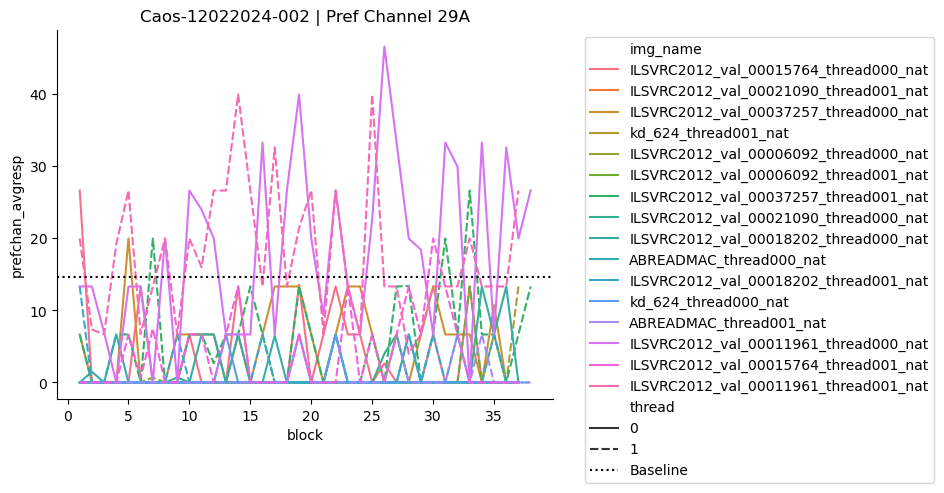

In [145]:
sns.lineplot(data=stim_info_df.query("natural"), x="block", y="prefchan_avgresp", 
             hue="img_name", style="thread", )
plt.axhline(pref_bslresp, color="black", linestyle=":", label="Baseline")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title(f"{exprow.ephysFN} | Pref Channel {prefchan_str}")
plt.show()


In [142]:
refimg_resp_tab = stim_info_df.query("natural").groupby("img_name").agg({"prefchan_avgresp": [ "mean", "sem", "count"]})
refimg_resp_tab

prefchan_avgresp                
                                                  mean       sem count
img_name                                                              
ABREADMAC_thread000_nat                       0.575832  0.300964    37
ABREADMAC_thread001_nat                       0.702962  0.335904    38
ILSVRC2012_val_00006092_thread000_nat         0.000000  0.000000    37
ILSVRC2012_val_00006092_thread001_nat         0.378502  0.359953    37
ILSVRC2012_val_00011961_thread000_nat        17.979944  1.972929    38
ILSVRC2012_val_00011961_thread001_nat        17.479669  1.517021    37
ILSVRC2012_val_00015764_thread000_nat         3.498788  1.017662    37
ILSVRC2012_val_00015764_thread001_nat         3.820618  0.876855    37
ILSVRC2012_val_00018202_thread000_nat         1.619961  0.599986    37
ILSVRC2012_val_00018202_thread001_nat         1.402071  0.512180    38
ILSVRC2012_val_00021090_thread000_nat         0.306475  0.207418    37
ILSVRC2012_val_00021090_thread001_nat         0.000000  0.000000    37
ILSVRC2012_val_00037257_thread000_nat         5.509816  0.898970    37
ILSVRC2012_val_00037257_thread001_nat         6.381380  1.055489    38
kd_624_thread000_nat                          0.539987  0.302978    37
kd_624_thread001_nat                          0.719983  0.430571    37

In [143]:
evolimg_block_resp_tab = stim_info_df.query("generated").groupby(["thread", "block"]).agg({"prefchan_avgresp": [ "mean", "sem", "count"]})
evolimg_block_resp_tab

prefchan_avgresp                
                         mean       sem count
thread block                                 
0      1             1.044462  0.598997    30
       2             1.496634  0.652138    40
       3             1.848578  0.789602    40
       4             4.126943  0.988513    40
       5             8.233249  1.699329    40
       6             6.839428  1.179718    40
       7             6.225147  1.286003    40
       8             7.761728  1.702197    40
       9             8.370700  1.216227    40
       10           11.795580  1.820303    40
       11           12.379984  1.849349    40
       12           14.865065  2.086758    40
       13           15.743795  1.572586    40
       14           17.476612  1.994470    40
       15           14.824261  1.989201    40
       16           23.386669  2.491198    40
       17           24.811402  2.303466    40
       18           25.476240  2.928056    40
       19           28.240815  2.425395    40
       20           25.653341  2.205696    40
       21           29.308128  1.887552    40
       22           23.731135  2.204044    40
       23           30.321250  2.420877    40
       24           35.652993  2.877627    40
       25           28.977679  2.908526    40
       26           37.869086  2.916420    40
       27           42.731397  3.929149    40
       28           46.306759  3.580590    40
       29           40.261279  2.882444    40
       30           46.992456  3.304588    40
       31           41.264992  3.658496    40
       32           45.949779  2.860415    40
       33           46.053775  2.937650    40
       34           46.109174  3.192457    40
       35           48.091595  3.324616    40
       36           55.050235  3.478067    40
       37           43.848441  2.396458    40
       38           40.892340  5.040726     8
1      1             1.109973  0.645248    30
       2             0.713554  0.713554    28
       3             2.649868  1.258372    28
       4             2.887192  0.991039    28
       5             3.827469  1.341987    28
       6             3.567243  1.587619    28
       7             3.463550  1.109705    28
       8             4.281325  1.819501    28
       9             3.805622  1.300170    28
       10            7.172754  1.646382    28
       11            5.441249  1.929549    28
       12            5.137025  2.082117    28
       13            6.183609  1.675307    28
       14            5.717476  1.700297    28
       15            4.518649  1.085495    28
       16           12.588144  3.401731    28
       17           11.023011  2.999975    28
       18           15.155590  2.524715    28
       19            9.012162  1.795812    28
       20           11.841667  2.614563    28
       21            7.971122  1.798997    28
       22           12.080973  1.869600    28
       23           14.150917  2.344717    28
       24           13.859141  2.486062    28
       25           10.280877  2.027576    28
       26           10.163193  2.178594    28
       27           18.474787  1.875085    28
       28           16.131592  2.166110    28
       29           12.371416  2.647013    28
       30           12.734175  2.175373    28
       31           12.609267  1.716117    28
       32           15.857465  2.693334    28
       33           11.273141  2.289177    28
       34           17.826179  2.136057    28
       35           15.063872  1.934153    28
       36           14.330427  2.440464    28
       37           14.458828  2.366622    28
       38           11.321592  4.729251     8

In [146]:
refimg_resp_tab = stim_info_df.query("natural").groupby("img_name").agg({"prefchan_avgresp": [ "mean", "sem", "count"]})
evolimg_block_resp_tab = stim_info_df.query("generated").groupby(["thread", "block"]).agg({"prefchan_avgresp": [ "mean", "sem", "count"]})

In [154]:
maxblock_resp_idx = evolimg_block_resp_tab["prefchan_avgresp", "mean"].idxmax()
maxblock_resp = evolimg_block_resp_tab["prefchan_avgresp", "mean"].max()
maxref_resp_idx = refimg_resp_tab["prefchan_avgresp", "mean"].idxmax()
maxref_resp = refimg_resp_tab["prefchan_avgresp", "mean"].max()
maxevolnat_resp = max(maxblock_resp, maxref_resp) # use this to normalize the response, so that the max response is 1 for both natural and generated
print("Max evolution response: ", maxblock_resp, f"at {maxblock_resp_idx}")
print("Max natural response: ", maxref_resp, f"at {maxref_resp_idx}")
print("Max response for normalization: ", maxevolnat_resp)


Max evolution response:  55.05023512499999 at (0, 36)
Max natural response:  17.979943963157893 at ILSVRC2012_val_00011961_thread000_nat
Max response for normalization:  55.05023512499999


In [161]:
maxresp_block_idx_thr0 = evolimg_block_resp_tab.xs(0, level='thread')["prefchan_avgresp", "mean"].idxmax()
maxresp_block_idx_thr1 = evolimg_block_resp_tab.xs(1, level='thread')["prefchan_avgresp", "mean"].idxmax()
maxresp_thr0 = evolimg_block_resp_tab.xs(0, level='thread')["prefchan_avgresp", "mean"].max()
maxresp_thr1 = evolimg_block_resp_tab.xs(1, level='thread')["prefchan_avgresp", "mean"].max()

In [160]:
maxblock_resp_idx_thr0 = evolimg_block_resp_tab.xs(0, level='thread')["prefchan_avgresp", "mean"].idxmax()

In [151]:
maxblock_resp

55.05023512499999

In [162]:
genvalid_stim_info_df = stim_info_df.query("valid_block and generated")
maxblock = genvalid_stim_info_df.block.max()

init_mask_thr0 = ((genvalid_stim_info_df.block == 1) | (genvalid_stim_info_df.block == 2)) & (genvalid_stim_info_df.thread == 0)
last_mask_thr0 = ((genvalid_stim_info_df.block == maxblock) | (genvalid_stim_info_df.block == maxblock - 1)) & (genvalid_stim_info_df.thread == 0)
if maxresp_block_idx_thr0 > 1:
    max_mask_thr0 = ((genvalid_stim_info_df.block == maxresp_block_idx_thr0) | (genvalid_stim_info_df.block == maxresp_block_idx_thr0 - 1)) & (genvalid_stim_info_df.thread == 0)
else:
    max_mask_thr0 = ((genvalid_stim_info_df.block == maxresp_block_idx_thr0) | (genvalid_stim_info_df.block == maxresp_block_idx_thr0 + 1)) & (genvalid_stim_info_df.thread == 0)

init_mask_thr1 = ((genvalid_stim_info_df.block == 1) | (genvalid_stim_info_df.block == 2)) & (genvalid_stim_info_df.thread == 1)
last_mask_thr1 = ((genvalid_stim_info_df.block == maxblock) | (genvalid_stim_info_df.block == maxblock - 1)) & (genvalid_stim_info_df.thread == 1)
if maxresp_block_idx_thr1 > 1:
    max_mask_thr1 = ((genvalid_stim_info_df.block == maxresp_block_idx_thr1) | (genvalid_stim_info_df.block == maxresp_block_idx_thr1 - 1)) & (genvalid_stim_info_df.thread == 1)
else:
    max_mask_thr1 = ((genvalid_stim_info_df.block == maxresp_block_idx_thr1) | (genvalid_stim_info_df.block == maxresp_block_idx_thr1 + 1)) & (genvalid_stim_info_df.thread == 1)

# init_resp = stim_info_df[init_mask].prefchan_avgresp
# last_resp = stim_info_df[last_mask].prefchan_avgresp

ttest_ind_print_df(genvalid_stim_info_df, last_mask_thr0, init_mask_thr0, "prefchan_avgresp", sem=True)
ttest_ind_print_df(genvalid_stim_info_df, max_mask_thr0, init_mask_thr0, "prefchan_avgresp", sem=True)
ttest_ind_print_df(genvalid_stim_info_df, last_mask_thr1, init_mask_thr1, "prefchan_avgresp", sem=True)
ttest_ind_print_df(genvalid_stim_info_df, max_mask_thr1, init_mask_thr1, "prefchan_avgresp", sem=True)
# tval, pval = ttest_ind(last_resp, init_resp)
# print(tval, pval)


prefchan_avgresp (N=80) ~ (N=70) 49.449+-2.191 (N=80) ~ 1.303+-0.450 (N=70) t=20.22, p=2.0e-44 df=148
prefchan_avgresp (N=80) ~ (N=70) 51.571+-2.422 (N=80) ~ 1.303+-0.450 (N=70) t=19.15, p=6.7e-42 df=148
prefchan_avgresp (N=56) ~ (N=58) 14.395+-1.684 (N=56) ~ 0.919+-0.476 (N=58) t=7.82, p=3.2e-12 df=112
prefchan_avgresp (N=56) ~ (N=58) 14.319+-1.530 (N=56) ~ 0.919+-0.476 (N=58) t=8.48, p=1.0e-13 df=112


(8.482987294034354,
 1.0138877261354546e-13,
 '14.319+-1.530 (N=56) ~ 0.919+-0.476 (N=58) t=8.48, p=1.0e-13 df=112')

### Scratch 

In [120]:
space_cfg.shape

(2, 1)

In [77]:
unit_info["prefchan_id"]

array([113], dtype=int64)

In [79]:
rasters.shape


(3120, 200, 123)

In [103]:
thread_num = evolution_cfg.shape[1]
stats = {}
# Sort the image names into threads, gens, nats, and blocks
imgnm = Trials.get('imageName', [])[0]
row_gen = [
    ("gen" in name) and 
    ("block" in name) and 
    (not name[:2].isdigit()) and 
    (not name.endswith("_nat"))
    for name in imgnm
]
row_gen = np.array(row_gen, dtype=bool)
row_nat = ~ row_gen

# Separate the thread 1 and 2 (and maybe thread 3, 4)
thread_msks = []
for threadi in range(thread_num):
    thread_str = f"thread{threadi:03d}"
    msk = [thread_str in name for name in imgnm]
    thread_msks.append(msk)
assert sum([sum(m) for m in thread_msks]) == len(imgnm), "Images do not cover all threads"

stats['stim'] = {
    'gen_msk': row_gen,
    'nat_msk': row_nat,
    'thread_msks': thread_msks
}

# Handle block information and color sequence
block_arr = np.array(Trials.block).astype(int).flatten()
block_list = list(range(block_arr.min(), block_arr.max() + 1))
block_num = len(block_list)
stats['evol'] = {}
stats['evol']['block_arr'] = block_arr.tolist()
stats['evol']['block_n'] = block_num
# color_seq = brewermap(block_num, 'spectral')
# stats['color_seq'] = color_seq

# Initialize generated and natural index sequences
gen_idx_seq = np.empty((thread_num, block_num), dtype=object)
nat_idx_seq = np.empty((thread_num, block_num), dtype=object)

for threadi in range(thread_num):
    for blocki in block_list: # note here blocki is 1 based indexing. 
        gen_msk = row_gen & (block_arr == blocki) & thread_msks[threadi]
        nat_msk = row_nat & (block_arr == blocki) & thread_msks[threadi]
        gen_idx_seq[threadi, blocki - block_list[0]] = np.where(gen_msk)[0].tolist()
        nat_idx_seq[threadi, blocki - block_list[0]] = np.where(nat_msk)[0].tolist()

# Collect trial by trial PSTH for the preferred channels
pref_chan_idx = unit_info["prefchan_id"][0]
rspwdw = slice(50, 200)
bslwdw = slice(0, 45)
# Assuming rasters is a 3D numpy array: trials x time x channels
pref_gen_psth_col = [[rasters[idx, :, pref_chan_idx] for idx in thread_block] for thread_block in gen_idx_seq]
pref_nat_psth_col = [[rasters[idx, :, pref_chan_idx] for idx in thread_block] for thread_block in nat_idx_seq]
# Collect trial by trial response for every channel (mean over time 51 to 200)
# Assuming rasters dimensions: channels x time x trials
avgresp_mat = np.mean(rasters[:, rspwdw, :], axis=1)  # 0-based indexing
bslresp_mat = np.mean(rasters[:, bslwdw, :], axis=1)  # 0-based indexing
pref_bslresp = np.mean(bslresp_mat[:, pref_chan_idx], axis=0)

gen_rspmat_col = [[avgresp_mat[idx, :,].squeeze() for idx in thread_block] for thread_block in gen_idx_seq]
nat_rspmat_col = [[avgresp_mat[idx, :,].squeeze() for idx in thread_block] for thread_block in nat_idx_seq]
pref_gen_avgresp_col = [[avgresp_mat[idx, pref_chan_idx].squeeze() for idx in thread_block] for thread_block in gen_idx_seq]
pref_nat_avgresp_col = [[avgresp_mat[idx, pref_chan_idx].squeeze() for idx in thread_block] for thread_block in nat_idx_seq]

stats['evol']['idx_seq'] = gen_idx_seq
stats['evol']['psth'] = pref_gen_psth_col
stats['evol']['rspmat'] = gen_rspmat_col

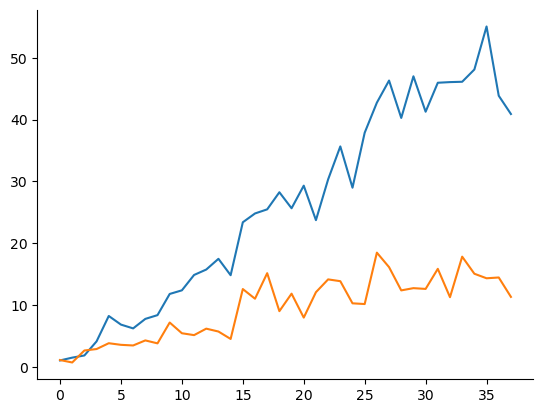

In [104]:
pref_gen_avgresp_mean = np.array([[np.mean(trial) for trial in block] for block in pref_gen_avgresp_col])
plt.plot(pref_gen_avgresp_mean.T)
plt.show()

In [105]:
thread_pattern = re.compile(r'thread(\d{3})_')
thread_values = [int(thread_pattern.search(name).group(1)) if thread_pattern.search(name) else None for name in imgnm]
stim_info_df = pd.DataFrame({"img_name": imgnm, "block": block_arr, "thread": thread_values, 
                             "generated": row_gen, "natural": row_nat, })
stim_info_df


img_name  block  thread  generated  natural
0      block001_thread000_gen_gen000_000025      1       0       True    False
1     ILSVRC2012_val_00015764_thread000_nat      1       0      False     True
2      block001_thread000_gen_gen000_000003      1       0       True    False
3     ILSVRC2012_val_00021090_thread001_nat      1       1      False     True
4      block001_thread001_gen_gen000_000042      1       1       True    False
...                                     ...    ...     ...        ...      ...
3115   block038_thread000_gen_gen037_002540     38       0       True    False
3116   block038_thread001_gen_gen037_002571     38       1       True    False
3117   block038_thread000_gen_gen037_002538     38       0       True    False
3118   block038_thread000_gen_gen037_002513     38       0       True    False
3119   block038_thread000_gen_gen037_002534     38       0       True    False

[3120 rows x 5 columns]

In [107]:
gen_idx_seq

array([[list([0, 2, 15, 16, 17, 19, 21, 28, 31, 32, 33, 34, 38, 40, 45, 48, 50, 51, 52, 56, 58, 60, 61, 62, 63, 68, 70, 71, 72, 75]),
        list([76, 77, 81, 82, 84, 86, 87, 91, 92, 94, 95, 98, 100, 102, 104, 105, 114, 115, 116, 117, 118, 119, 120, 122, 123, 125, 127, 131, 135, 136, 137, 140, 141, 142, 144, 146, 150, 155, 156, 157]),
        list([160, 163, 164, 165, 167, 168, 169, 171, 176, 177, 178, 182, 188, 190, 191, 193, 194, 196, 200, 201, 202, 206, 211, 213, 214, 217, 218, 219, 222, 223, 224, 228, 232, 233, 235, 236, 237, 238, 239, 243]),
        list([244, 252, 254, 255, 256, 257, 261, 262, 267, 268, 269, 270, 274, 276, 277, 279, 283, 286, 287, 289, 292, 298, 299, 300, 301, 302, 303, 304, 306, 308, 310, 311, 312, 314, 315, 316, 317, 322, 323, 325]),
        list([330, 331, 334, 338, 340, 341, 342, 343, 346, 348, 352, 354, 355, 356, 358, 360, 361, 369, 373, 375, 376, 379, 381, 383, 384, 385, 388, 390, 391, 392, 394, 395, 396, 397, 398, 399, 401, 406, 407, 410]),
        list([

In [109]:
final_block_num = np.array([len(gen_idx_seq[threadi, -1]) for threadi in range(thread_num)])
if not np.all(final_block_num >= 10):
    final_block_msk = block_arr == block_arr.max()
    stim_info_df["valid_block"] = ~ final_block_msk
else:
    stim_info_df["valid_block"] = True



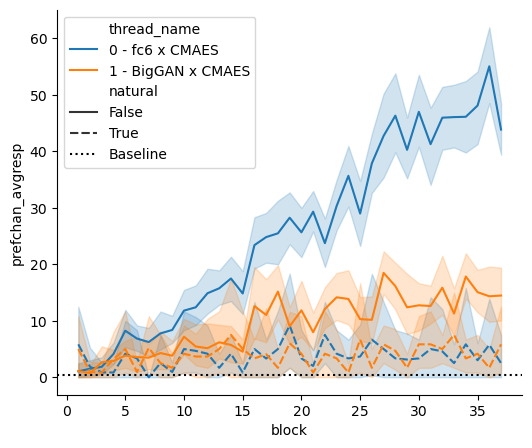

In [110]:
# check the number of stimuli in the final block if any thread has < 10 stimuli, then create the mask out of the final block
final_block_num = [len(gen_idx_seq[threadi, -1]) for threadi in range(thread_num)]
final_block_msk = np.array(final_block_msk, dtype=bool)

stim_info_df["prefchan_avgresp"] = avgresp_mat[:, pref_chan_idx]

stim_info_df["thread_name"] = stim_info_df["thread"].replace(\
    {0: f"0 - {GANspace1} x {optimizer1}", 
     1: f"1 - {GANspace2} x {optimizer2}"})

plt.figure(figsize=(6, 5))
sns.lineplot(data=stim_info_df.query("valid_block"), x="block", y="prefchan_avgresp", 
             hue="thread_name", style="natural", )
plt.axhline(pref_bslresp, color="black", linestyle=":", label="Baseline")
plt.legend()
plt.title(f"{exprow.ephysFN} | Pref Channel {prefchan_str}")
plt.show()

In [ ]:
def parse_evolution_info(image_names, blocks, thread_num):
    stim_info = []
    re_pattern = r'(noise|class)_eig(\d+)_lin([+-]?\d+\.\d+)'
    stim_info = []
    for name in image_names: 
        match = re.match(re_pattern, name)
        if match:
            space_name = match.groups()[0]
            eig_value = int(match.groups()[1])
            lin_value = float(match.groups()[2])
            stim_info.append({"img_name": name, "space_name": space_name, "eig_id": eig_value, "lin_dist": lin_value, "hessian_img": True, })
        else:
            stim_info.append({"img_name": name, "space_name": None, "eig_id": None, "lin_dist": None, "hessian_img": False, })
    
    stim_info_df = pd.DataFrame(stim_info)
    if stim_info_df.hessian_img.sum() == 0:
        print(f"Warning: No hessian images found for {image_names[:10]}..., try the older pattern")
        re_pattern = r'(noise|class)_eig(\d+)_exp([+-]?\d+\.\d+)_lin([+-]?\d+\.\d+)'
        stim_info = []
        for name in image_names: 
            match = re.match(re_pattern, name)
            if match:
                space_name = match.groups()[0]
                eig_value = int(match.groups()[1])
                exp_value = float(match.groups()[2])
                lin_value = float(match.groups()[3])
                stim_info.append({"img_name": name, "space_name": space_name, "eig_id": eig_value, "lin_dist": lin_value, "exp_value": exp_value, "hessian_img": True, })
            else:
                stim_info.append({"img_name": name, "space_name": None, "eig_id": None, "lin_dist": None, "exp_value": None, "hessian_img": False, })
        stim_info_df = pd.DataFrame(stim_info)
    return stim_info_df

In [70]:
gen_idx_seq.shape

AttributeError: 'list' object has no attribute 'shape'

In [68]:
np.where(gen_msk)[0].tolist()

[3101, 3102, 3104, 3105, 3107, 3110, 3113, 3116]

In [21]:
space_cfg[0, 1][0,0]

'BigGAN'

In [18]:
space_cfg[0]

array([array([['fc6'],
              [array([0., 0.])]], dtype=object),
       array([['BigGAN'],
              [array([0., 0.])]], dtype=object)], dtype=object)

In [26]:
evolution_cfg[4][0]

'CMAES'

In [10]:
evolution_cfg

array([[array([[91.]]), array([[91.]])],
       [array([[0.],
               [0.]]), array([[0.],
                              [0.]])],
       [array([[2.]]), array([[2.]])],
       [array([[2.]]), array([[2.]])],
       ['CMAES', 'CMAES']], dtype=object)

In [29]:
optim_cfg[0][0]

{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[3.]])}

In [8]:
Trials.TrialRecord.User.optim_opts

array([[{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[3.]])}],
       [{'Aupdate_freq': array([[10.]]), 'init_sigma': array([[0.06]])}]],
      dtype=object)

In [40]:
space_cfg[0,1][1,0]

array([0., 0.])

In [34]:
Trials.TrialRecord.User.space_cfg

array([[array([['fc6'],
               [array([0., 0.])]], dtype=object),
        array([['BigGAN'],
               [array([0., 0.])]], dtype=object)]], dtype=object)

In [6]:
Trials.TrialRecord.User.evoConfiguration

array([[array([[29.]]), array([[29.]])],
       [array([[0.],
               [1.]]), array([[0.],
                              [1.]])],
       [array([[3.]]), array([[3.]])],
       [array([[1.]]), array([[1.]])],
       ['CMAES', 'CMAES']], dtype=object)

In [44]:
import os
import numpy as np
import pickle
from datetime import datetime
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io as sio

# Placeholder for custom functions
def generate_unit_labels_new(spikeID, unitID):
    # Implement this function based on your MATLAB version
    return [f"Unit_{uid}" for uid in unitID]

def generate_unit_labels(spikeID):
    # Implement this function based on your MATLAB version
    return [f"Unit_{sid}" for sid in spikeID]

def check_channel_active_label(unit_name_arr, spikeID, rasters):
    # Implement this function based on your MATLAB version
    activ_msk = np.array([uid != 0 for uid in spikeID])
    unit_num_arr = spikeID  # Example placeholder
    return activ_msk, unit_name_arr, unit_num_arr

def Evol_BigGAN_FC6_Collect_Stats_fun(meta, rasters, Trials):
    """
    Compress the information relevant to the preferred channel evolution into a small structure
    and save each structure into a specified folder.
    
    Parameters:
    - meta_new: List of metadata dictionaries
    - rasters_new: List of raster data (numpy arrays or similar)
    - Trials_new: List of Trials data (dictionaries)
    
    Returns:
    - BFEStats: List of dictionaries containing the collected statistics
    """
    # BFEStats = []
    
    # # Define the saveroot directory
    # # Only the last assignment is effective; adjust as needed
    # saveroot = r"E:\OneDrive - Harvard University\BigGAN_Hessian"
    # Path(saveroot).mkdir(parents=True, exist_ok=True)
    
    # for iTr in range(len(meta_new)):
    #     meta = meta_new[iTr]
    
    # Determine the Animal based on meta.ephysFN
    ephysFN = meta.get('ephysFN', '')
    if any(sub in ephysFN for sub in ["Alfa", "ALfa"]):
        Animal = "Alfa"
    elif "Beto" in ephysFN:
        Animal = "Beto"
    elif "Caos" in ephysFN:
        Animal = "Caos"
    elif "Diablito" in ephysFN:
        Animal = "Diablito"
    else:
        Animal = "Unknown"
    
    # Check if rasters is NaN or empty
    if rasters is None or (isinstance(rasters, float) and np.isnan(rasters)) or (isinstance(rasters, (list, np.ndarray)) and len(rasters) == 0):
        raise ValueError(f"Rasters is NaN or empty for {meta.get('ephysFN', '')} {meta.get('expControlFN', '')}")
    
    print(f"Processing experiment {meta.get('ephysFN', '')} {meta.get('expControlFN', '')}")
    
    # Initialize the stats dictionary for this trial
    stats = {}
    stats['Animal'] = Animal
    stats['imageName'] = Trials.get('imageName', '')
    stats['meta'] = meta
    
    # Check for TrialRecord
    trial_record = Trials.get('TrialRecord', {})
    if not trial_record or not trial_record.get('User', {}):
        print("Missing Trial Record")
        raise ValueError(f"Missing Trial Record for {meta.get('ephysFN', '')} {meta.get('expControlFN', '')}")
    
    user = trial_record['User']
    pref_chan = user.get('prefChan', [])
    evo_config = user.get('evoConfiguration', [])
    
    if len(evo_config) == 0:
        print("Missing evoConfiguration")
        raise ValueError(f"Missing evoConfiguration for {meta.get('ephysFN', '')} {meta.get('expControlFN', '')}")
    
    unit_in_pref_chan = np.array([cfg[3] for cfg in evo_config]).astype(int)
    imgpos = np.array([cfg[1] for cfg in evo_config]).astype(int)
    imgsize = np.array([cfg[2] for cfg in evo_config]).astype(int)
    thread_num = len(evo_config)
    
    if 'unitID' in meta:
        unit_num_arr = meta['unitID']
        unit_name_arr = generate_unit_labels_new(meta['spikeID'], meta['unitID'])
        activ_msk = unit_num_arr != 0
    else:
        unit_name_arr = generate_unit_labels(meta['spikeID'])
        activ_msk, unit_name_arr, unit_num_arr = check_channel_active_label(unit_name_arr, meta['spikeID'], rasters)
    
    try:
        pref_chan_id = np.zeros(thread_num, dtype=int)
        for i in range(thread_num):
            condition = (meta['spikeID'] == pref_chan[i]) & (unit_num_arr == unit_in_pref_chan[i])
            matches = np.where(condition)[0]
            if len(matches) == 0:
                raise ValueError(f"No matching pref_chan_id for thread {i}")
            pref_chan_id[i] = matches[0]
        
        assert pref_chan_id[0] == pref_chan_id[1], "First two pref_chan_ids do not match"
    except Exception as err:
        print(f"Error message:\n{err}")
        print(f"Meta: {meta}")
        raise ValueError(f"Error in pref_chan_id for {meta.get('ephysFN', '')} {meta.get('expControlFN', '')}")
    
    # Populate units information
    stats['units'] = {
        'pref_chan': pref_chan,
        'unit_name_arr': unit_name_arr,
        'unit_num_arr': unit_num_arr,
        'activ_msk': activ_msk,
        'spikeID': meta.get('spikeID', []),
        'pref_chan_id': pref_chan_id.tolist(),
        'unit_in_pref_chan': unit_in_pref_chan.tolist()
    }
    
    # Handle Optim_names
    if len(evo_config[0]) == 5:
        Optim_names = [str(cfg[-1]).replace("_", " ") for cfg in evo_config]
    elif len(evo_config[0]) == 4:
        Optim_names = ["CMAES"] * thread_num
    else:
        Optim_names = ["Unknown"] * thread_num
    
    # Handle space names and configurations
    if 'space' in user:
        evol_space_names = user['space']
        evol_space_cfg = user['space_cfg']
    else:
        if ephysFN == 'Alfa-06072020-002':
            evol_space_names = ['fc6', 'BigGAN']
            evol_space_cfg = [['fc6', []], ['BigGAN', []]]
        elif ephysFN == 'Alfa-06072020-003':
            evol_space_names = ['fc6', 'BigGAN_class']
            evol_space_cfg = [['fc6', []], ['BigGAN_class', []]]
        else:
            import pdb; pdb.set_trace()  # Equivalent to MATLAB's keyboard
            evol_space_names = []
            evol_space_cfg = []
    
    stats['evol'] = {
        'space_names': evol_space_names,
        'space_cfg': evol_space_cfg,
        'optim_names': Optim_names,
        'thread_num': thread_num,
        'imgpos': imgpos.tolist(),
        'imgsize': imgsize.tolist(),
        'unit_in_pref_chan': unit_in_pref_chan.tolist(),
        'pref_chan': list(user['evoConfiguration'][0]),  # Assuming first column
        'block_arr': np.array(Trials.get('block', [])).astype(int).tolist(),
        'block_n': len(range(min(Trials.get('block', [])), max(Trials.get('block', [])) + 1))
    }
    
    # Sort the image names into threads, gens, nats, and blocks
    imgnm = Trials.get('imageName', [])
    row_gen = [
        ("gen" in name) and 
        ("block" in name) and 
        (not name[:2].isdigit()) and 
        (not name.endswith("_nat"))
        for name in imgnm
    ]
    row_nat = [not rg for rg in row_gen]
    
    # Separate the thread 1 and 2 (and maybe thread 3, 4)
    thread_msks = []
    for threadi in range(thread_num):
        thread_str = f"thread{threadi:03d}"
        msk = [thread_str in name for name in imgnm]
        thread_msks.append(msk)
    
    assert sum([sum(m) for m in thread_msks]) == len(imgnm), "Images do not cover all threads"
    
    stats['stim'] = {
        'gen_msk': row_gen,
        'nat_msk': row_nat,
        'thread_msks': thread_msks
    }
    
    # Handle block information and color sequence
    block_arr = np.array(Trials.get('block', [])).astype(int)
    block_list = list(range(block_arr.min(), block_arr.max() + 1))
    block_num = len(block_list)
    # color_seq = brewermap(block_num, 'spectral')
    # stats['color_seq'] = color_seq
    stats['evol']['block_arr'] = block_arr.tolist()
    stats['evol']['block_n'] = block_num
    
    # Initialize generated and natural index sequences
    gen_idx_seq = [[[] for _ in range(block_num)] for _ in range(thread_num)]
    nat_idx_seq = [[[] for _ in range(block_num)] for _ in range(thread_num)]
    
    for threadi in range(thread_num):
        for blocki in block_list:
            gen_msk = row_gen and (block_arr == blocki) and thread_msks[threadi]
            nat_msk = row_nat and (block_arr == blocki) and thread_msks[threadi]
            gen_idx_seq[threadi][blocki - block_list[0]] = np.where(gen_msk)[0].tolist()
            nat_idx_seq[threadi][blocki - block_list[0]] = np.where(nat_msk)[0].tolist()
    
    # Collect trial by trial PSTH for the preferred channels
    pref_chan_idx = pref_chan_id[0]
    # Assuming rasters is a 3D numpy array: channels x time x trials
    gen_psth_col = [[rasters[pref_chan_idx, :, idx] for idx in thread_block] for thread_block in gen_idx_seq]
    nat_psth_col = [[rasters[pref_chan_idx, :, idx] for idx in thread_block] for thread_block in nat_idx_seq]
    
    # Collect trial by trial response for every channel (mean over time 51 to 200)
    # Assuming rasters dimensions: channels x time x trials
    mean_rasters = np.mean(rasters[:, 50:200, :], axis=1)  # 0-based indexing
    gen_rspmat_col = [[mean_rasters[:, idx].squeeze() for idx in thread_block] for thread_block in gen_idx_seq]
    nat_rspmat_col = [[mean_rasters[:, idx].squeeze() for idx in thread_block] for thread_block in nat_idx_seq]
    
    stats['evol']['idx_seq'] = gen_idx_seq
    stats['evol']['psth'] = gen_psth_col
    stats['evol']['rspmat'] = gen_rspmat_col
    stats['ref'] = {
        'idx_seq': nat_idx_seq,
        'psth': nat_psth_col,
        'rspmat': nat_rspmat_col
    }
    
    # Create the folder and file at last
    stimparts = meta.get('stimuli', '').split("\\")
    expday_str = meta.get('expControlFN', '')[:6]
    expday = datetime.strptime(expday_str, '%y%m%d').strftime('%Y-%m-%d')
    
    # Adjust the folder name as per MATLAB's compose function
    # Example: "stimparts[-2]-ChanXX"
    if len(stimparts) >= 2:
        fdrnm = f"{stimparts[-2]}-Chan{pref_chan[0]:02d}"
    else:
        fdrnm = f"Chan{pref_chan[0]:02d}"
    
    # figdir = os.path.join(saveroot, fdrnm)
    stats['meta'] = {
        **stats['meta'],
        'fdrnm': fdrnm,
        # 'figdir': figdir
    }
    
    # if os.path.exists(figdir):
    #     print(f"Warning: {figdir} figure directory exists! Beware.")
    # else:
    #     os.makedirs(figdir, exist_ok=True)
    
    # Save the EvolStat as a pickle file
    EvolStat = stats
    # save_path = os.path.join(figdir, "EvolStat.pkl")
    # with open(save_path, 'wb') as f:
    #     pickle.dump(EvolStat, f)
    
    # print(f"ExpStats saved to {save_path}!")
    
    # # Append the stats to BFEStats
    # BFEStats.append(stats)
    
    return EvolStat


In [45]:
EvolStat = Evol_BigGAN_FC6_Collect_Stats_fun(meta, rasters, Trials)


Processing experiment Caos-12022024-002 241202_143902_Caos_generate_BigGAN


IndexError: index 3 is out of bounds for axis 0 with size 2

In [ ]:
import os
import numpy as np
import pickle
from datetime import datetime
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io as sio

# Placeholder for custom functions
def generate_unit_labels_new(spikeID, unitID):
    # Implement this function based on your MATLAB version
    return [f"Unit_{uid}" for uid in unitID]

def generate_unit_labels(spikeID):
    # Implement this function based on your MATLAB version
    return [f"Unit_{sid}" for sid in spikeID]

def check_channel_active_label(unit_name_arr, spikeID, rasters):
    # Implement this function based on your MATLAB version
    activ_msk = np.array([uid != 0 for uid in spikeID])
    unit_num_arr = spikeID  # Example placeholder
    return activ_msk, unit_name_arr, unit_num_arr

def brewermap(n, palette):
    # Use seaborn or matplotlib to get a similar color palette
    if palette.lower() == 'spectral':
        return sns.color_palette("Spectral", n)
    else:
        return sns.color_palette("viridis", n)

def Evol_BigGAN_FC6_Collect_Stats_fun(meta_new, rasters_new, Trials_new):
    """
    Compress the information relevant to the preferred channel evolution into a small structure
    and save each structure into a specified folder.
    
    Parameters:
    - meta_new: List of metadata dictionaries
    - rasters_new: List of raster data (numpy arrays or similar)
    - Trials_new: List of Trials data (dictionaries)
    
    Returns:
    - BFEStats: List of dictionaries containing the collected statistics
    """
    BFEStats = []
    
    # Define the saveroot directory
    # Only the last assignment is effective; adjust as needed
    saveroot = r"E:\OneDrive - Harvard University\BigGAN_Hessian"
    Path(saveroot).mkdir(parents=True, exist_ok=True)
    
    for iTr in range(len(meta_new)):
        meta = meta_new[iTr]
        
        # Determine the Animal based on meta.ephysFN
        ephysFN = meta.get('ephysFN', '')
        if any(sub in ephysFN for sub in ["Alfa", "ALfa"]):
            Animal = "Alfa"
        elif "Beto" in ephysFN:
            Animal = "Beto"
        elif "Caos" in ephysFN:
            Animal = "Caos"
        elif "Diablito" in ephysFN:
            Animal = "Diablito"
        else:
            Animal = "Unknown"
        
        rasters = rasters_new[iTr]
        Trials = Trials_new[iTr]
        
        # Check if rasters is NaN or empty
        if rasters is None or (isinstance(rasters, float) and np.isnan(rasters)) or (isinstance(rasters, (list, np.ndarray)) and len(rasters) == 0):
            continue
        
        print(f"Processing experiment {meta.get('ephysFN', '')} {meta.get('expControlFN', '')}")
        
        # Initialize the stats dictionary for this trial
        stats = {}
        stats['Animal'] = Animal
        stats['imageName'] = Trials.get('imageName', '')
        stats['meta'] = meta
        
        # Check for TrialRecord
        trial_record = Trials.get('TrialRecord', {})
        if not trial_record or not trial_record.get('User', {}):
            print("Missing Trial Record")
            continue
        
        user = trial_record['User']
        pref_chan = user.get('prefChan', [])
        evo_config = user.get('evoConfiguration', [])
        
        if not evo_config:
            print("Missing evoConfiguration")
            continue
        
        unit_in_pref_chan = np.array([cfg[3] for cfg in evo_config]).astype(int)
        imgpos = np.array([cfg[1] for cfg in evo_config]).astype(int)
        imgsize = np.array([cfg[2] for cfg in evo_config]).astype(int)
        thread_num = len(evo_config)
        
        if 'unitID' in meta:
            unit_num_arr = meta['unitID']
            unit_name_arr = generate_unit_labels_new(meta['spikeID'], meta['unitID'])
            activ_msk = unit_num_arr != 0
        else:
            unit_name_arr = generate_unit_labels(meta['spikeID'])
            activ_msk, unit_name_arr, unit_num_arr = check_channel_active_label(unit_name_arr, meta['spikeID'], rasters)
        
        try:
            pref_chan_id = np.zeros(thread_num, dtype=int)
            for i in range(thread_num):
                condition = (meta['spikeID'] == pref_chan[i]) & (unit_num_arr == unit_in_pref_chan[i])
                matches = np.where(condition)[0]
                if len(matches) == 0:
                    raise ValueError(f"No matching pref_chan_id for thread {i}")
                pref_chan_id[i] = matches[0]
            
            assert pref_chan_id[0] == pref_chan_id[1], "First two pref_chan_ids do not match"
        except Exception as err:
            print(f"Error message:\n{err}")
            print(f"Meta: {meta}")
            continue
        
        # Populate units information
        stats['units'] = {
            'pref_chan': pref_chan,
            'unit_name_arr': unit_name_arr,
            'unit_num_arr': unit_num_arr,
            'activ_msk': activ_msk,
            'spikeID': meta.get('spikeID', []),
            'pref_chan_id': pref_chan_id.tolist(),
            'unit_in_pref_chan': unit_in_pref_chan.tolist()
        }
        
        # Handle Optim_names
        if len(evo_config[0]) == 5:
            Optim_names = [str(cfg[-1]).replace("_", " ") for cfg in evo_config]
        elif len(evo_config[0]) == 4:
            Optim_names = ["CMAES"] * thread_num
        else:
            Optim_names = ["Unknown"] * thread_num
        
        # Handle space names and configurations
        if 'space' in user:
            evol_space_names = user['space']
            evol_space_cfg = user['space_cfg']
        else:
            if ephysFN == 'Alfa-06072020-002':
                evol_space_names = ['fc6', 'BigGAN']
                evol_space_cfg = [['fc6', []], ['BigGAN', []]]
            elif ephysFN == 'Alfa-06072020-003':
                evol_space_names = ['fc6', 'BigGAN_class']
                evol_space_cfg = [['fc6', []], ['BigGAN_class', []]]
            else:
                import pdb; pdb.set_trace()  # Equivalent to MATLAB's keyboard
                evol_space_names = []
                evol_space_cfg = []
        
        stats['evol'] = {
            'space_names': evol_space_names,
            'space_cfg': evol_space_cfg,
            'optim_names': Optim_names,
            'thread_num': thread_num,
            'imgpos': imgpos.tolist(),
            'imgsize': imgsize.tolist(),
            'unit_in_pref_chan': unit_in_pref_chan.tolist(),
            'pref_chan': list(user['evoConfiguration'][0]),  # Assuming first column
            'block_arr': np.array(Trials.get('block', [])).astype(int).tolist(),
            'block_n': len(range(min(Trials.get('block', [])), max(Trials.get('block', [])) + 1))
        }
        
        # Sort the image names into threads, gens, nats, and blocks
        imgnm = Trials.get('imageName', [])
        row_gen = [
            ("gen" in name) and 
            ("block" in name) and 
            (not name[:2].isdigit()) and 
            (not name.endswith("_nat"))
            for name in imgnm
        ]
        row_nat = [not rg for rg in row_gen]
        
        # Separate the thread 1 and 2 (and maybe thread 3, 4)
        thread_msks = []
        for threadi in range(thread_num):
            thread_str = f"thread{threadi:03d}"
            msk = [thread_str in name for name in imgnm]
            thread_msks.append(msk)
        
        assert sum([sum(m) for m in thread_msks]) == len(imgnm), "Images do not cover all threads"
        
        stats['stim'] = {
            'gen_msk': row_gen,
            'nat_msk': row_nat,
            'thread_msks': thread_msks
        }
        
        # Handle block information and color sequence
        block_arr = np.array(Trials.get('block', [])).astype(int)
        block_list = list(range(block_arr.min(), block_arr.max() + 1))
        block_num = len(block_list)
        # color_seq = brewermap(block_num, 'spectral')
        # stats['color_seq'] = color_seq
        stats['evol']['block_arr'] = block_arr.tolist()
        stats['evol']['block_n'] = block_num
        
        # Initialize generated and natural index sequences
        gen_idx_seq = [[[] for _ in range(block_num)] for _ in range(thread_num)]
        nat_idx_seq = [[[] for _ in range(block_num)] for _ in range(thread_num)]
        
        for threadi in range(thread_num):
            for blocki in block_list:
                gen_msk = row_gen and (block_arr == blocki) and thread_msks[threadi]
                nat_msk = row_nat and (block_arr == blocki) and thread_msks[threadi]
                gen_idx_seq[threadi][blocki - block_list[0]] = np.where(gen_msk)[0].tolist()
                nat_idx_seq[threadi][blocki - block_list[0]] = np.where(nat_msk)[0].tolist()
        
        # Collect trial by trial PSTH for the preferred channels
        pref_chan_idx = pref_chan_id[0]
        # Assuming rasters is a 3D numpy array: channels x time x trials
        gen_psth_col = [[rasters[pref_chan_idx, :, idx] for idx in thread_block] for thread_block in gen_idx_seq]
        nat_psth_col = [[rasters[pref_chan_idx, :, idx] for idx in thread_block] for thread_block in nat_idx_seq]
        
        # Collect trial by trial response for every channel (mean over time 51 to 200)
        # Assuming rasters dimensions: channels x time x trials
        mean_rasters = np.mean(rasters[:, 50:200, :], axis=1)  # 0-based indexing
        gen_rspmat_col = [[mean_rasters[:, idx].squeeze() for idx in thread_block] for thread_block in gen_idx_seq]
        nat_rspmat_col = [[mean_rasters[:, idx].squeeze() for idx in thread_block] for thread_block in nat_idx_seq]
        
        stats['evol']['idx_seq'] = gen_idx_seq
        stats['evol']['psth'] = gen_psth_col
        stats['evol']['rspmat'] = gen_rspmat_col
        stats['ref'] = {
            'idx_seq': nat_idx_seq,
            'psth': nat_psth_col,
            'rspmat': nat_rspmat_col
        }
        
        # Create the folder and file at last
        stimparts = meta.get('stimuli', '').split("\\")
        expday_str = meta.get('expControlFN', '')[:6]
        expday = datetime.strptime(expday_str, '%y%m%d').strftime('%Y-%m-%d')
        
        # Adjust the folder name as per MATLAB's compose function
        # Example: "stimparts[-2]-ChanXX"
        if len(stimparts) >= 2:
            fdrnm = f"{stimparts[-2]}-Chan{pref_chan[0]:02d}"
        else:
            fdrnm = f"Chan{pref_chan[0]:02d}"
        
        figdir = os.path.join(saveroot, fdrnm)
        stats['meta'] = {
            **stats['meta'],
            'fdrnm': fdrnm,
            'figdir': figdir
        }
        
        if os.path.exists(figdir):
            print(f"Warning: {figdir} figure directory exists! Beware.")
        else:
            os.makedirs(figdir, exist_ok=True)
        
        # Save the EvolStat as a pickle file
        EvolStat = stats
        save_path = os.path.join(figdir, "EvolStat.pkl")
        with open(save_path, 'wb') as f:
            pickle.dump(EvolStat, f)
        
        print(f"ExpStats saved to {save_path}!")
        
        # Append the stats to BFEStats
        BFEStats.append(stats)
    
    return BFEStats


In [105]:
for _, exprow in ExpRecord_Evol.iterrows():
    print(exprow.ephysFN,exprow.Expi)
    data = pkl.load(open(join(pkl_root, f"{exprow.ephysFN}.pkl"), "rb"))
    rasters = data["rasters"]
    meta = data["meta"]
    Trials = data["Trials"]
    imageName = np.squeeze(Trials.imageName)
    stimuli_dir = exprow.stimuli
    break

Caos-12022024-002 1.0


In [117]:
for _, exprow in ExpRecord_Evol.iterrows():
    print(exprow.ephysFN,exprow.Expi)
    data = pkl.load(open(join(pkl_root, f"{exprow.ephysFN}.pkl"), "rb"))
    rasters = data["rasters"]
    meta = data["meta"]
    Trials = data["Trials"]
    imageName = np.squeeze(Trials.imageName)
    stimuli_dir = exprow.stimuli
    prefchan = Trials.TrialRecord.User.prefChan
    prefunit = Trials.TrialRecord.User.unit_perChan
    print(prefchan, prefunit)

Caos-12022024-002 1.0
[[91. 91.]] [[2. 2.]]
Caos-12022024-005 2.0
[[94. 94.]] [[1. 1.]]
Caos-12042024-002 3.0
[[71. 71.]] [[2. 2.]]
Caos-12042024-006 4.0
[[72. 72.]] [[1. 1.]]
Caos-12092024-003 5.0
[[92. 92.]] [[2. 2.]]
Caos-12102024-002 6.0
[[68. 68.]] [[2. 2.]]
Caos-12102024-005 7.0
[[69. 69.]] [[1. 1.]]
Diablito-03122024-002 1.0
[[56. 56.]] [[1. 1.]]
Diablito-11122024-002 2.0
[[42. 42.]] [[2. 2.]]
Diablito-11122024-004 3.0
[[34. 34.]] [[2. 2.]]
Diablito-12122024-003 4.0
[[64. 64.]] [[2. 2.]]
Diablito-12122024-005 5.0
[[50. 50.]] [[1. 1.]]


In [112]:
Trials.TrialRecord.User.evoConfiguration

array([[array([[91.]]), array([[91.]])],
       [array([[0.],
               [0.]]), array([[0.],
                              [0.]])],
       [array([[2.]]), array([[2.]])],
       [array([[2.]]), array([[2.]])],
       ['CMAES', 'CMAES']], dtype=object)

In [113]:
Trials.TrialRecord.User.unit_perChan

array([[2., 2.]])

In [114]:
Trials.TrialRecord.User.space_cfg


array([[array([['fc6'],
               [array([0., 0.])]], dtype=object),
        array([['BigGAN'],
               [array([0., 0.])]], dtype=object)]], dtype=object)

In [115]:
prefchan = Trials.TrialRecord.User.prefChan
prefunit = Trials.TrialRecord.User.prefUnit


array([[91., 91.]])

In [109]:
list(Trials.TrialRecord.User)


['Aupdate_freq',
 'TaskObject',
 'TaskObject_cell',
 'allEventInfo',
 'bkgwindow',
 'bonus_per_consecutiveTrial',
 'bonus_per_pic',
 'codes_',
 'continuousChans',
 'currentBlock',
 'evkwindow',
 'evoConfiguration',
 'gen',
 'generatedMax',
 'generatedMean',
 'generatedSem',
 'iConfig',
 'ids_',
 'image_names',
 'images',
 'imposeRng',
 'init_pop_load',
 'init_pop_path',
 'init_sigma',
 'init_x',
 'lastBlock',
 'maximize',
 'meanActivityVector_thisBlock',
 'myFlags',
 'nNaturalImages',
 'nPicsToShow',
 'nThreads',
 'natImagePath',
 'naturalMax',
 'naturalMean',
 'naturalSem',
 'newPicsHome',
 'online',
 'optim_opts',
 'parentDir',
 'picsHome',
 'platform',
 'population_size',
 'pos_perChan',
 'prefChan',
 'psth',
 'psthBins',
 'pythonDir',
 'responseMatrix',
 'rewFinal',
 'rewSize',
 'rewardStructure',
 'scores',
 'scores_record',
 'seeds',
 'serverRef',
 'sharedDirRoot',
 'sigma',
 'space',
 'space_cfg',
 'space_opts',
 'space_setting',
 'stimulusID',
 'stimulusStartCode',
 'synth_imag

In [52]:
for _, exprow in ExpRecord_Hessian.iterrows():
    print(exprow.ephysFN,exprow.Expi)
    data = pkl.load(open(join(pkl_root, f"{exprow.ephysFN}.pkl"), "rb"))
    rasters = data["rasters"]
    meta = data["meta"]
    Trials = data["Trials"]
    imageName = np.squeeze(Trials.imageName)
    stimuli_dir = exprow.stimuli
    break

Caos-12022024-003 1.0


In [25]:
# Organize the unit information
spikeID = meta.spikeID[0].astype(int)
channel_id = spikeID # set alias
unit_id = meta.unitID[0].astype(int)
char_map = {0:"U", 1: 'A', 2: 'B', 3: 'C', 4: 'D', 5: 'E', 6: 'F', 7: 'G', 8: 'H'}
unit_str = [f"{channel_id}{char_map[unit_id]}" for channel_id, unit_id in zip(channel_id, unit_id)]
prefchan = exprow.pref_chan
prefchan_id_allunits = np.where((channel_id == prefchan))[0]
prefunit = 1 # the prefchan is the first unit???
prefchan_id = np.where((channel_id == prefchan) & (unit_id == prefunit))[0]
prefchan_str = unit_str[prefchan_id.item()]
prefchan_id_allunits

array([110, 111], dtype=int64)

In [70]:
import glob
def find_full_image_paths(folder_path, image_names):
    """
    Searches the specified folder for image files whose stem matches the given image names.

    Parameters:
        folder_path (str): Path to the folder containing the images.
        image_names (list of str): List of image name stems to search for.

    Returns:
        dict: A dictionary mapping each imageName to its full filename. If no matching file is found, the value is None.
    """
    files = glob.glob(os.path.join(folder_path, "*"))
    file_map = {}
    for f in files:
        stem = os.path.splitext(os.path.basename(f))[0]
        if stem in image_names:
            file_map[stem] = f
    return {img_name: file_map.get(img_name) for img_name in image_names}


def parse_stim_info(image_names):
    stim_info = []
    re_pattern = r'(noise|class)_eig(\d+)_lin([+-]?\d+\.\d+)'
    for name in image_names: 
        match = re.match(re_pattern, name)
        if match:
            space_name = match.groups()[0]
            eig_value = int(match.groups()[1])
            lin_value = float(match.groups()[2])
            stim_info.append({"img_name": name, "space_name": space_name, "eig_id": eig_value, "lin_dist": lin_value, "hessian_img": True, "trial_ids": indices_per_name[name]})
        else:
            stim_info.append({"img_name": name, "space_name": None, "eig_id": None, "lin_dist": None, "hessian_img": False, "trial_ids": indices_per_name[name]})

    stim_info_df = pd.DataFrame(stim_info)
    return stim_info_df


In [71]:
# parse the image name
unique_imgnames = np.unique(imageName)
uniq_img_full_path_dict = find_full_image_paths(stimuli_dir, unique_imgnames)
indices_per_name = {name: np.where(imageName == name)[0] for name in unique_imgnames} # indices of the trials with the same image name
stim_info_df = parse_stim_info(unique_imgnames)

In [66]:
noise_dist_list = np.sort(stim_info_df.loc[stim_info_df.space_name == 'noise', 'lin_dist'].unique())
noise_eig_list = np.sort(stim_info_df.loc[stim_info_df.space_name == 'noise', 'eig_id'].unique())
noise_idx_array = np.empty((len(noise_eig_list), len(noise_dist_list)), dtype=object)
for i, eig_id in enumerate(noise_eig_list):
    for j, dist in enumerate(noise_dist_list):
        mask = (stim_info_df.space_name == 'noise') & (stim_info_df.eig_id == eig_id) & (stim_info_df.lin_dist == dist)
        assert np.sum(mask) == 1, f"More than one trial found for eig_id {eig_id} and lin_dist {dist}"
        noise_idx_array[i, j] = stim_info_df.loc[mask, 'trial_ids'].values[0]


In [9]:
rasters.shape  # trials x time x units

(798, 200, 120)

In [82]:
from scipy import stats
# neural responses
wdw = slice(50, 200)
bslwdw = slice(0, 45)

respmat = rasters[:, wdw, :].mean(axis=1)
bslmat = rasters[:, bslwdw, :].mean(axis=1)
prefchan_resp_sgtr = respmat[:, prefchan_id] 
prefchan_bsl_sgtr = bslmat[:, prefchan_id]
prefchan_bsl_mean = prefchan_bsl_sgtr.mean()
prefchan_bsl_sem = stats.sem(prefchan_bsl_sgtr, axis=0)
# prefchan_bsl_sem = stats.sem(bslmat, axis=1)

In [83]:
prefchan_bsl_sem

array([1.3682147], dtype=float32)

In [11]:
sgtr_resp_df = pd.DataFrame({"img_name": imageName, "pref_unit_resp": prefchan_resp_sgtr[:, 0]})
sgtr_resp_df = sgtr_resp_df.merge(stim_info_df.drop(columns=['trial_ids']), on="img_name");
sgtr_resp_df.columns

Index(['img_name', 'pref_unit_resp', 'space_name', 'eig_id', 'lin_dist', 'hessian_img'], dtype='object')

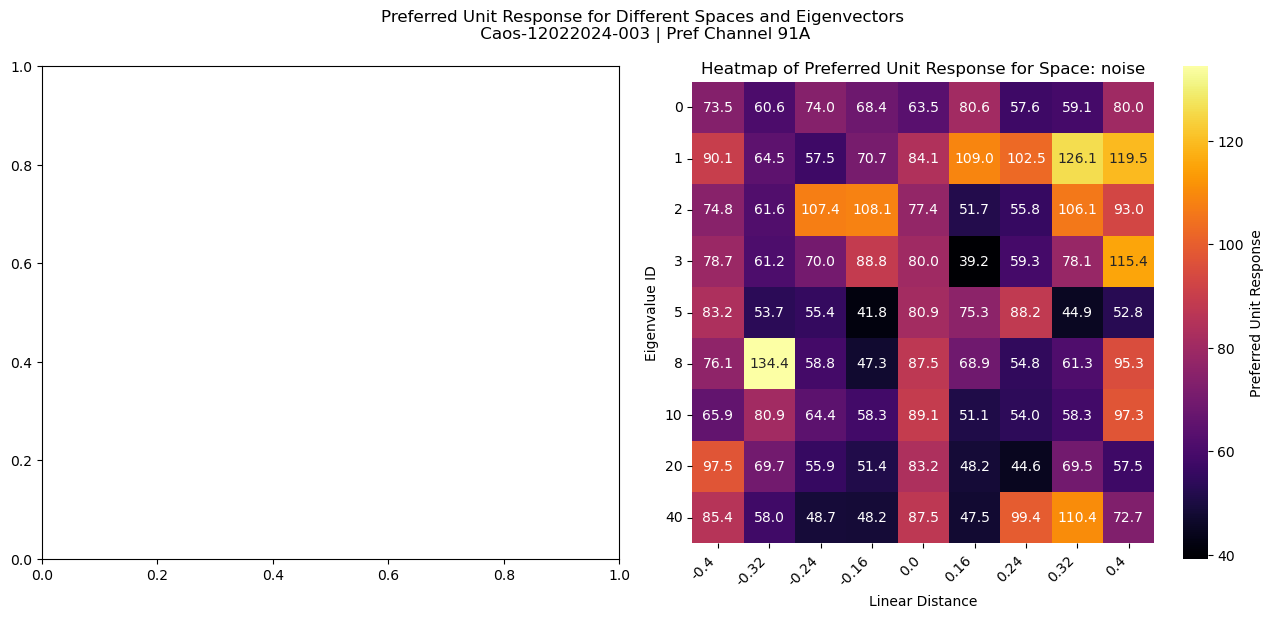

In [30]:
# Group by and compute the mean of preferred unit responses
grouped = sgtr_resp_df.groupby(['space_name', 'eig_id', 'lin_dist']).agg({'pref_unit_resp': 'mean'}).reset_index()
# Pivot the data to create a matrix for each space_name
space_names = grouped['space_name'].unique()
figh, axs = plt.subplots(1, 2, figsize=(13, 6))
for ax, space in zip(axs, ['class', 'noise',]):
    plt.sca(ax)
    space_data = grouped[grouped['space_name'] == space]
    pivot_table = space_data.pivot(index='eig_id', columns='lin_dist', values='pref_unit_resp') # set values as float
    pivot_table = pivot_table.astype(float)
    if pivot_table.empty:
        continue
    sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap='inferno', 
                cbar_kws={'label': 'Preferred Unit Response'}, ax=ax)
    plt.title(f'Heatmap of Preferred Unit Response for Space: {space}')
    plt.xlabel('Linear Distance')
    plt.ylabel('Eigenvalue ID')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.axis('image')
plt.suptitle(f'Preferred Unit Response for Different Spaces and Eigenvectors \n {exprow.ephysFN} | Pref Channel {prefchan_str} ')
plt.tight_layout()
plt.show()

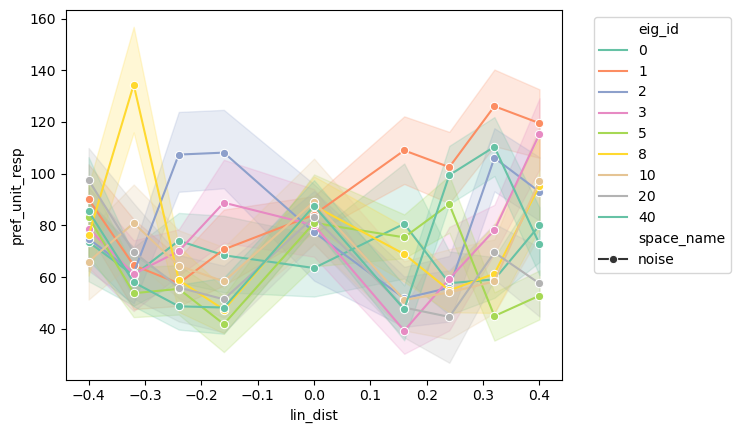

In [41]:
space = "noise"
sns.lineplot(data=sgtr_resp_df, x='lin_dist', y='pref_unit_resp', hue='eig_id', style='space_name', palette='Set2', markers=True)
# sns.scatterplot(data=sgtr_resp_df, x='lin_dist', y='pref_unit_resp', hue='eig_id', style='space_name', palette='Set2', legend=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


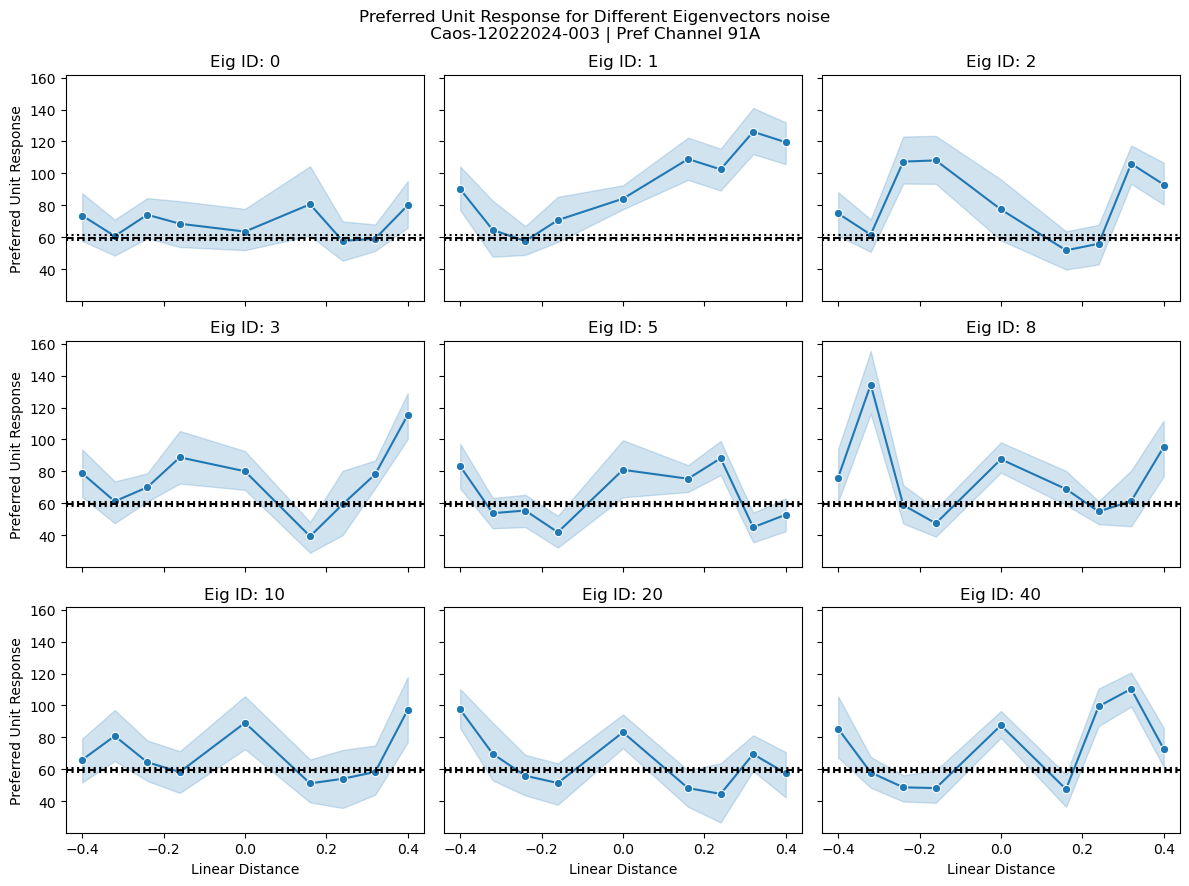

In [104]:

space = "noise"
filtered_df = sgtr_resp_df.query(f"space_name == '{space}'")
unique_eig_ids = sorted(filtered_df['eig_id'].unique())
num_eig_ids = len(unique_eig_ids)
# Determine grid size
cols = 3
rows = math.ceil(num_eig_ids / cols)

fig, axs = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3), sharex=True, sharey=True)
axs = axs.flatten()

for i, eig_id in enumerate(unique_eig_ids):
    ax = axs[i]
    subset = filtered_df[filtered_df['eig_id'] == eig_id]
    sns.lineplot(data=subset, x='lin_dist', y='pref_unit_resp', ax=ax, marker='o') # default to plot 95% confidence interval around the mean
    ax.set_title(f'Eig ID: {eig_id}')
    ax.set_xlabel('Linear Distance')
    ax.set_ylabel('Preferred Unit Response')
    ax.axhline(prefchan_bsl_mean, color='black', linestyle='--', label='Baseline Mean')
    ax.axhline(prefchan_bsl_mean + prefchan_bsl_sem, color='black', linestyle=':', label='Baseline SEM')
    ax.axhline(prefchan_bsl_mean - prefchan_bsl_sem, color='black', linestyle=':')

# Remove any unused subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.suptitle(f'Preferred Unit Response for Different Eigenvectors {space}\n {exprow.ephysFN} | Pref Channel {prefchan_str} ')
# plt.legend(title='Space Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

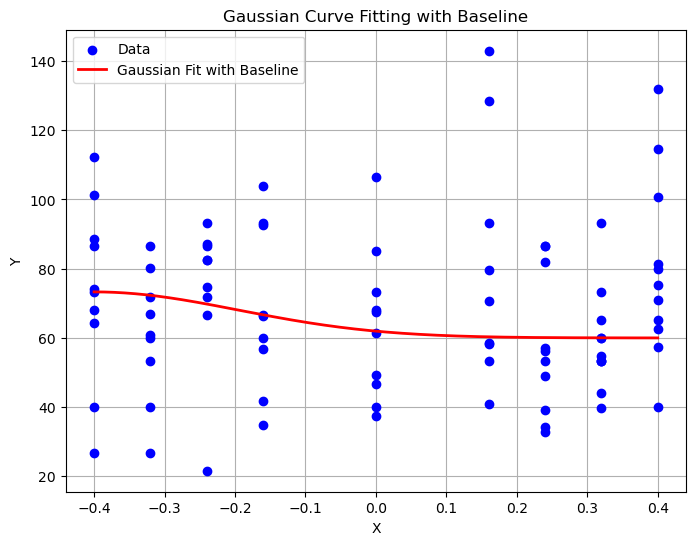

Fitted Parameters:
Amplitude (a): 13.3267
Mean (mu): -0.4000
Standard Deviation (sigma): 0.2044
Baseline: 59.9084


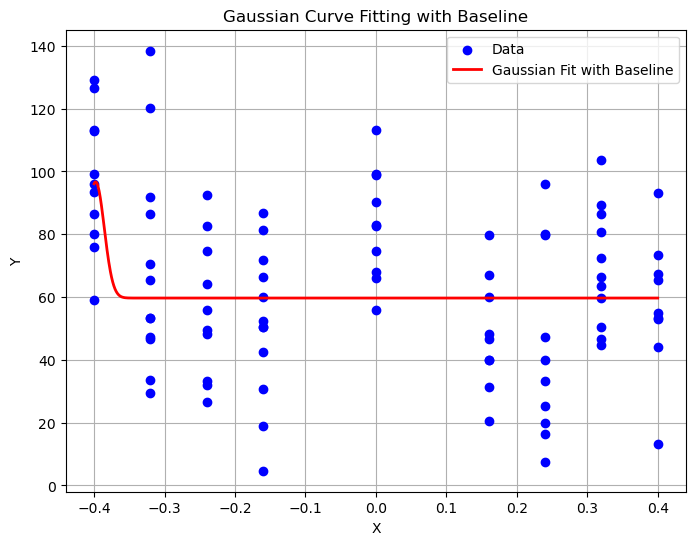

Fitted Parameters:
Amplitude (a): 37.0075
Mean (mu): -0.3978
Standard Deviation (sigma): 0.0122
Baseline: 59.6854
An error occurred during curve fitting: Optimal parameters not found: The maximum number of function evaluations is exceeded.
An error occurred during curve fitting: Optimal parameters not found: The maximum number of function evaluations is exceeded.


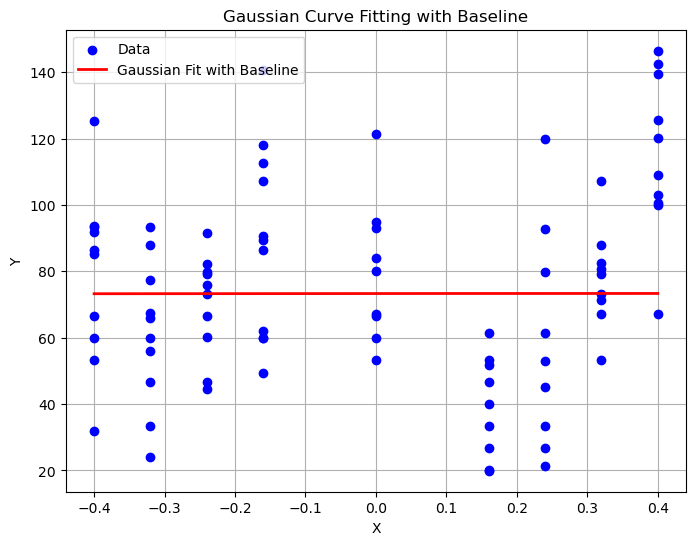

Fitted Parameters:
Amplitude (a): 52.7450
Mean (mu): 0.4000
Standard Deviation (sigma): 14.3619
Baseline: 20.5972


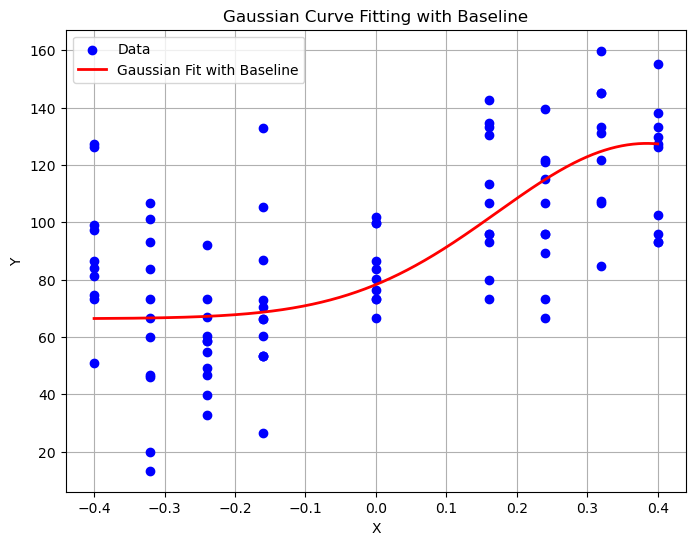

Fitted Parameters:
Amplitude (a): 61.1471
Mean (mu): 0.3844
Standard Deviation (sigma): 0.2124
Baseline: 66.3554


Fitted Parameters:
Amplitude (a): 31.8783
Mean (mu): 0.1230
Standard Deviation (sigma): 0.1114
Baseline: 53.2099


Fitted Parameters:
Amplitude (a): 58.5928
Mean (mu): 0.4000
Standard Deviation (sigma): 6.2165
Baseline: 22.0693


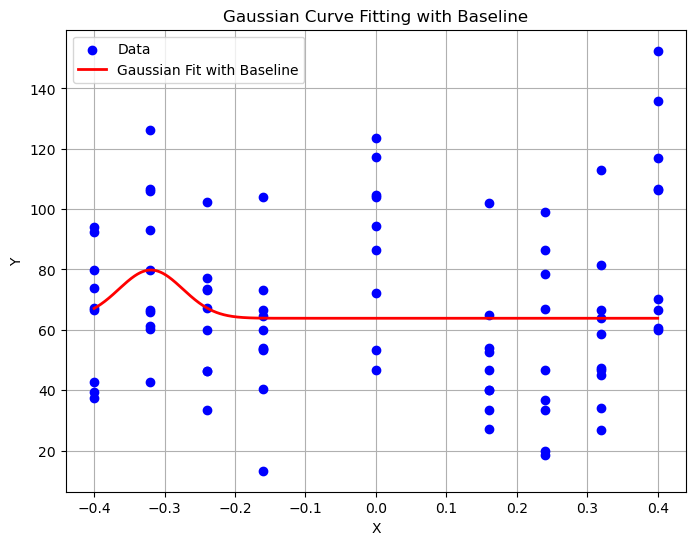

Fitted Parameters:
Amplitude (a): 15.9812
Mean (mu): -0.3193
Standard Deviation (sigma): 0.0453
Baseline: 63.8398


In [103]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define the Gaussian function with baseline
def gaussian_with_baseline(x, a, mu, sigma, baseline):
    return a * np.exp(-((x - mu) ** 2) / (2 * sigma ** 2)) + baseline

# Function to fit Gaussian curve with baseline
def fit_gaussian_with_baseline(x_data, y_data):
    """
    Fits a Gaussian curve with a baseline to the given data and plots the result.
    
    Args:
        x_data (array-like): Independent variable data (e.g., x-axis points).
        y_data (array-like): Dependent variable data (e.g., y-axis points).
    
    Returns:
        popt (tuple): Optimized parameters (a, mu, sigma, baseline).
        pcov (2D array): Covariance matrix of the parameters.
    """
    # Initial guesses for parameters: amplitude, mean, standard deviation, baseline
    y_range = np.percentile(y_data, [5, 95])  # Use percentiles to avoid outliers
    x_range = np.percentile(x_data, [5, 95])
    
    # More robust initial guesses using percentiles and IQR
    initial_amplitude = y_range[1] - y_range[0]
    initial_mean = np.median(x_data)  # Use median instead of mean
    initial_sigma = (x_range[1] - x_range[0]) / 4  # Estimate from data range
    initial_baseline = y_range[0]
    initial_guess = [initial_amplitude, initial_mean, initial_sigma, initial_baseline]
    
    try:
        # Fit with robust loss function and bounds
        bounds = ([0, min(x_data), 0, min(y_data)],  # Lower bounds
                 [np.inf, max(x_data), np.inf, max(y_data)])  # Upper bounds
        popt, pcov = curve_fit(
            gaussian_with_baseline, x_data, y_data, 
            p0=initial_guess,
            bounds=bounds,
            method='trf',  # Trust Region Reflective algorithm
            loss='huber',  # Huber loss is more robust to outliers
            f_scale=0.1,   # Scale parameter for the loss function
            max_nfev=2000  # Increase max iterations
        )
        
        # Plot original data and fitted curve
        plt.figure(figsize=(8, 6))
        plt.scatter(x_data, y_data, label="Data", color="blue", zorder=2)
        
        # Generate smooth curve for the fitted function
        x_fit = np.linspace(min(x_data), max(x_data), 1000)
        y_fit = gaussian_with_baseline(x_fit, *popt)
        plt.plot(x_fit, y_fit, label="Gaussian Fit with Baseline", color="red", linewidth=2, zorder=3)
        
        plt.title("Gaussian Curve Fitting with Baseline")
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.legend()
        plt.grid(True, zorder=1)
        plt.show()
        
        print("Fitted Parameters:")
        print(f"Amplitude (a): {popt[0]:.4f}")
        print(f"Mean (mu): {popt[1]:.4f}")
        print(f"Standard Deviation (sigma): {popt[2]:.4f}")
        print(f"Baseline: {popt[3]:.4f}")
        
    except Exception as e:
        print(f"An error occurred during curve fitting: {e}")
        popt, pcov = None, None
        
    return popt, pcov

# Example usage (replace with your own data)
# x_data = np.array([...])  # x-axis values
# y_data = np.array([...])  # y-axis values
# fit_gaussian_with_baseline(x_data, y_data)
space = "noise"

for eig_id in sgtr_resp_df.query(f"space_name == '{space}'")["eig_id"].unique():
    sgtr_axis = sgtr_resp_df.query(f"space_name == '{space}' and eig_id == {eig_id}")
    fit_gaussian_with_baseline(sgtr_axis["lin_dist"], sgtr_axis["pref_unit_resp"])

### Dev zone

In [ ]:
stim_info = []
re_pattern = r'(noise|class)_eig(\d+)_lin([+-]?\d+\.\d+)'
for name in unique_imgnames: 
    match = re.match(re_pattern, name)
    if match:
        space_name = match.groups()[0]
        eig_value = int(match.groups()[1])
        lin_value = float(match.groups()[2])
        stim_info.append({"img_name": name, "space_name": space_name, "eig_id": eig_value, "lin_dist": lin_value, "hessian_img": True, "trial_ids": indices_per_name[name]})
    else:
        stim_info.append({"img_name": name, "space_name": None, "eig_id": None, "lin_dist": None, "hessian_img": False, "trial_ids": indices_per_name[name]})

stim_info_df = pd.DataFrame(stim_info)
